## Case Introduction
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births. 
Parallel to notion of child mortality is of course maternal mortality, which accounts for 295000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

## Objectives
- To perform an exploratory data analysis of the dataset.
- Find variables that can help prevent child and maternal mortality.

## Data Description
The parameters rescorded from the CTGs are as follows:
- baseline value: Baseline Fetal Heart Rate (FHR)
- accelerations: Number of accelerations per second                                          
- fetal_movement: Number of fetal movements per second                                       
- uterine_contractions:Number of uterine contractions per second                               
- light_decelerations: Number of LDs per second                                    
- severe_decelerations: Number of SDs per second                                     
- prolongued_decelerations: Number of PDs per second                               
- abnormal_short_term_variability: Percentage of time with abnormal short term variability    
- mean_value_of_short_term_variability: Mean value of short term variability                   
- percentage_of_time_with_abnormal_long_term_variability  
- mean_value_of_long_term_variability: Percentage of time with abnormal long term variability  
- histogram_width: description of histogram feature                                          
- histogram_min: description of histogram feature                                            
- histogram_max: description of histogram feature                                         
- histogram_number_of_peaks: description of histogram feature                           
- histogram_number_of_zeroes : description of histogram feature                           
- histogram_mode: description of histogram feature                                        
- histogram_mean : description of histogram feature                                         
- histogram_median : description of histogram feature                                       
- histogram_variance  : description of histogram feature                                   
- histogram_tendency : description of histogram feature                                  
- fetal_health: 1=Normal, 2= Suspect, 3=Pathological


## Import Packages

In [1]:
import pandas as pd
import numpy as np

# Data Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt

#Statistical Packages
import scipy.stats as stats 
from sklearn.model_selection import train_test_split#To split data into a train and test sets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

#Advanced Statistical Packages
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
#Filter out warnings
import warnings
warnings.filterwarnings("ignore")



## Import and Read Dataset

In [2]:
data=pd.read_csv('assignment07_fetal_health.xls.csv')

data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                     0                       0.0   
1                0.003                     0                       0.0   
2                0.003                     0                       0.0   
3                0.003                     0                       0.0   
4                0.000                     0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                 43       ...             62   
1                                                  0       ...             68   
2                                                  0       ...             68   
3                                                  0       ...             53   
4                                                  0       ...             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1  

[5 rows x 22 columns]

## Initial Exploration of the Dataset

In [3]:
data.shape

(2126, 22)

#### Comment
- The dataset has 2126 rows and 22 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   int64  
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

#### Observation/ Comment:
- The dataset is made up of integers and floats
- The 'baseline value' column is not conventionally labeled. It has a space instead of underscore 

In [5]:
## Find the number of unique values per column
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        1
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

#### Comment 
- fetal_health has 3 unique values and this corresponds with the classification provided:
1: Normal
2:Suspect
3: Pathological
    
- This column will have to be converted to a categorical variable

In [6]:
# Check for duplicated data
data.duplicated().sum()

13

#### Observation:
-There are 13 instances of duplicated data in this dataset

In [7]:
# Check for missing values
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#### Observation 
- There is no missing data in this dataset

## Data Cleaning

### Step 1: Create a copy of the dataset

In [8]:
df= data.copy()

### Step 2: Rename 'baseline value' as 'baseline_value' and 'prolongued_decelerations ' as 'prolonged_decelerations '

In [9]:
df=df.rename(columns={'baseline value':'baseline_value',
                     'prolongued_decelerations': 'prolonged_decelerations'})


### Step 3: Drop Duplicated Values

In [10]:
df=df.drop_duplicates()

### Step 4: Change 'fetal_health' column to a categorical data type

In [11]:
df['fetal_health']=df['fetal_health'].astype('str')

## Exploratory Data Analysis

In [12]:
df.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolonged_decelerations  \
0                0.000                     0                      0.0   
1                0.003                     0                      0.0   
2                0.003                     0                      0.0   
3                0.003                     0                      0.0   
4                0.000                     0                      0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                 43       ...             62   
1                                                  0       ...             68   
2                                                  0       ...             68   
3                                                  0       ...             53   
4                                                  0       ...             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1  

[5 rows x 22 columns]

In [13]:
df.shape

(2113, 22)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2113 non-null   int64  
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   int64  
 6   prolonged_decelerations                                 2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   int64  
 8   mean_value_of_short_term_variability  

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [17]:
df.describe()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
count     2113.000000    2113.000000     2113.000000           2113.000000   
mean       133.304780       0.003188        0.009517              0.004387   
std          9.837451       0.003871        0.046804              0.002941   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.005000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolonged_decelerations  \
count          2113.000000                2113.0              2113.000000   
mean              0.001901                   0.0                 0.000159   
std               0.002966                   0.0                 0.000592   
min               0.000000                   0.0                 0.000000   
25%               0.000000                   0.0                 0.000000   
50%               0.000000                   0.0                 0.000000   
75%               0.003000                   0.0                 0.000000   
max               0.015000                   0.0                 0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2113.000000                           2113.000000   
mean                         46.993848                              1.335021   
std                          17.177782                              0.884368   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        2113.000000       ...   
mean                                            9.795078       ...   
std                                            18.337073       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             0.000000       ...   
75%                                            11.000000       ...   
max                                            91.000000       ...   

       histogram_width  histogram_min  histogram_max  \
count      2113.000000    2113.000000    2113.000000   
mean         70.535258      93.564600     164.099858   
std          39.007706      29.562269      17.945175   
min           3.000000      50.000000     122.000000   
25%          37.000000      67.000000     152.000000   
50%          68.000000      93.000000     162.000000   
75%         100.000000     120.000000     174.000000   
max         180.000000     159.000000     238.000000   

       histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
count                2113.000000                 2113.000000     2113.000000   
mean                    4.077142                    0.325603      137.454330   
std                     2.951664                    0.707771       16.402026   
min                     0.000000                    0.000000       60.000000   
25%                     2.000000                    0.000000      129.000000   
50%                     4.000000                    0.000000      139.000000   
75%                     6.000000                    0.000000      148.000000   
max                    18.000000                   10.000000      187.000000   

       histogram_mean  histogram

#### Observations:
- All preexisting data set issues have been resolved:
- The dataset has 2113 rows and 22 columns.
- There is no missing or duplicated data.
- The data set consists of object, integer and float data types

## Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.

def hist_box(data, column, figsize=(12, 7), kde=False, bins=None, title=None):
    """
    This function takes the following args:
    data: dataframe
    column: dataframe column
    figsize: size of figure (default (12,7))
    kde= False: do not show density curve 
    bins: number of bins for histogram (default None),
    title: Title of the column
    
    and plots a combined boxplot and histogram using seaborn
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=column, ax=ax_box2, showmeans=True, color="blue"
    )  # boxplot will be created the mean value of the column will be indicated
    sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[column].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[column].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def annotated_barplot(data, feature, perc=True, n=None):
    """
    This function plots a barplot with  the seaborn package 
    and shows the percentage at the top by taking the
    following args:

    data: dataframe
    feature: dataframe column
    perc: (default is False)
    n: displays the top n category levels (default is None)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # show the percentage of each class 
        else:
            label = p.get_height()  # count of each level 

        x = p.get_x() + p.get_width() / 2  # width 
        y = p.get_height()  # height 

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the graph

    plt.show()  

### Univariate Analysis of Numerical Variables

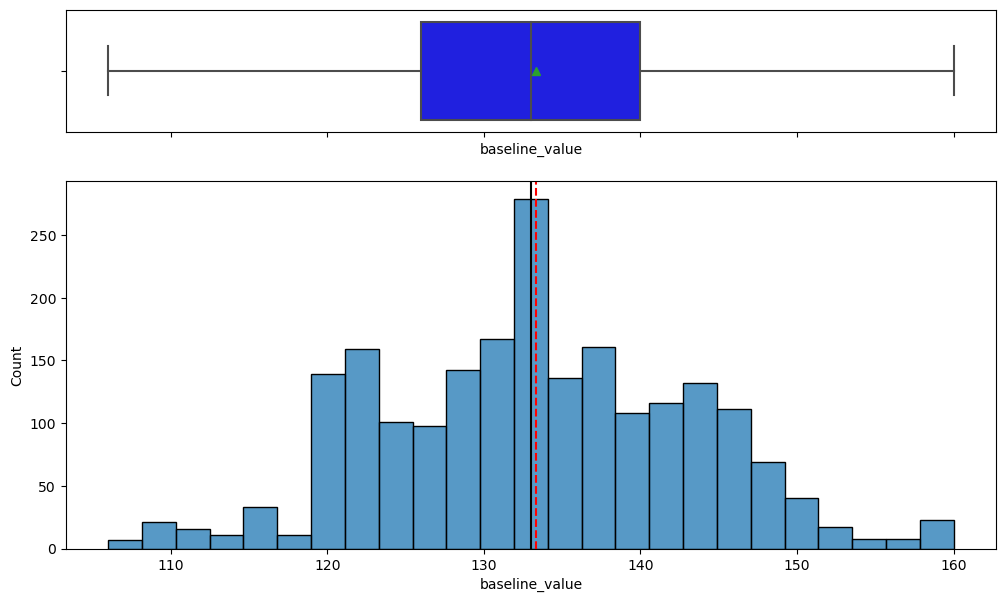

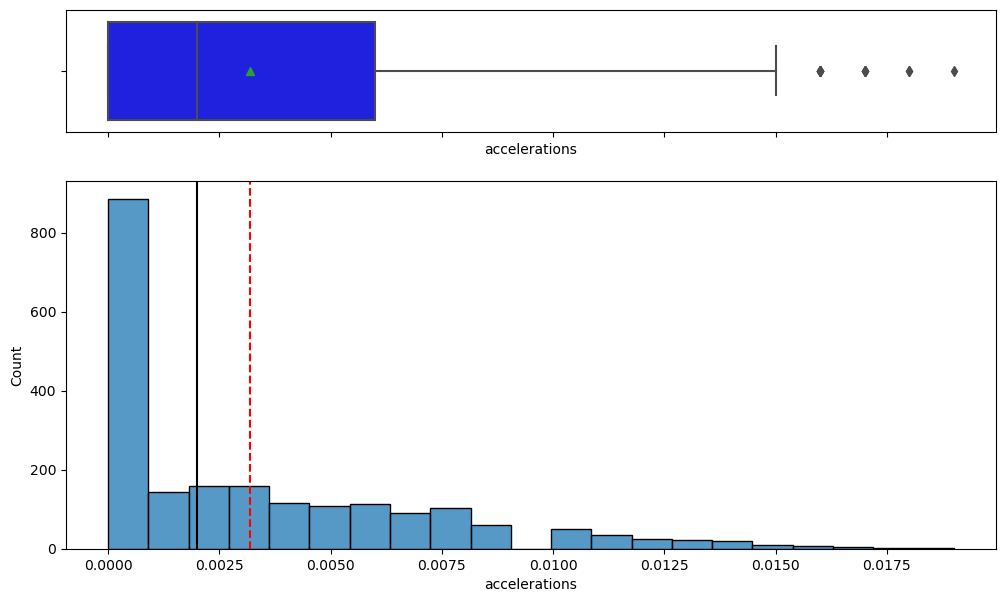

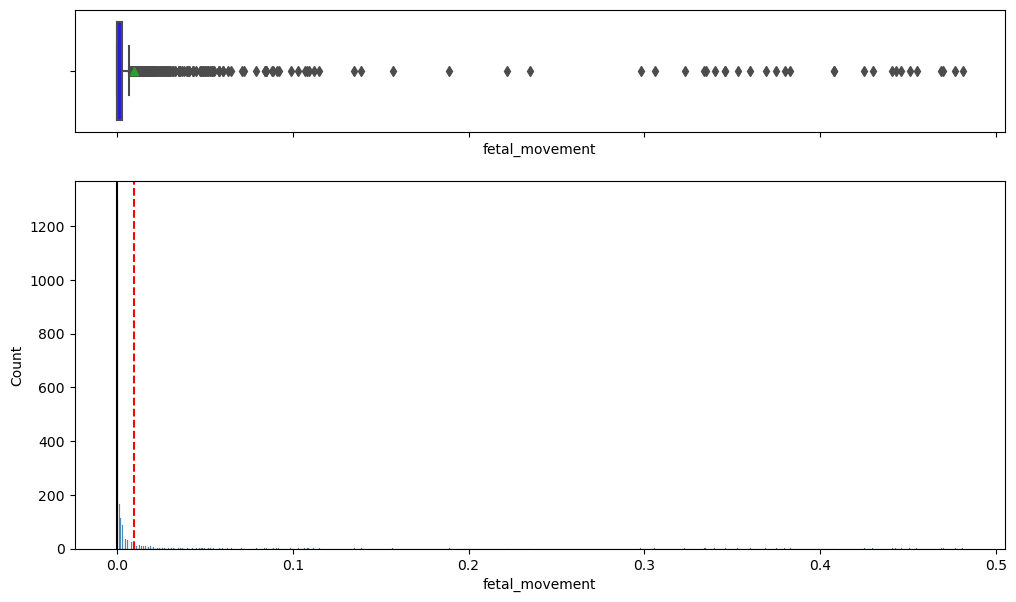

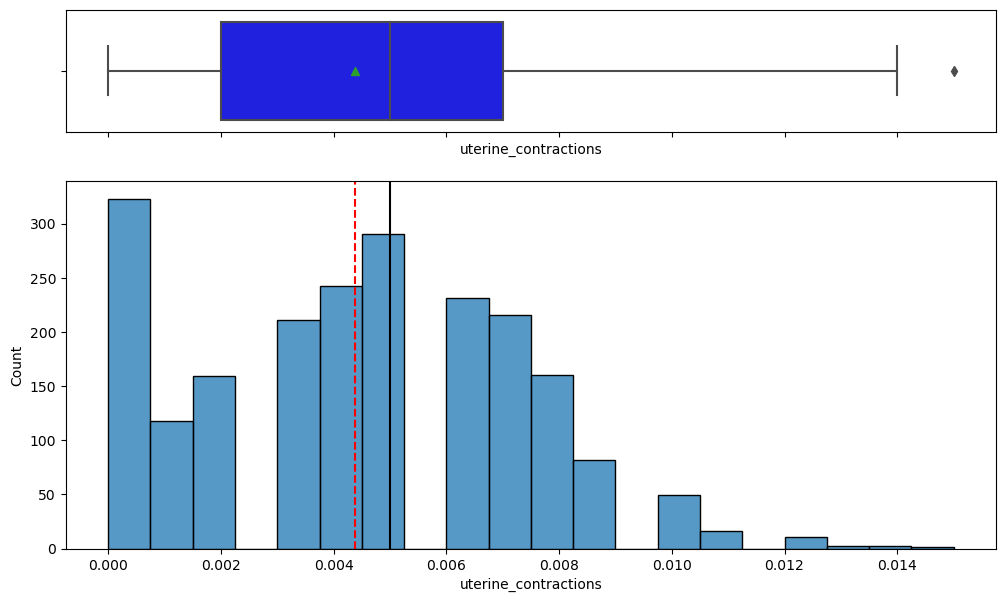

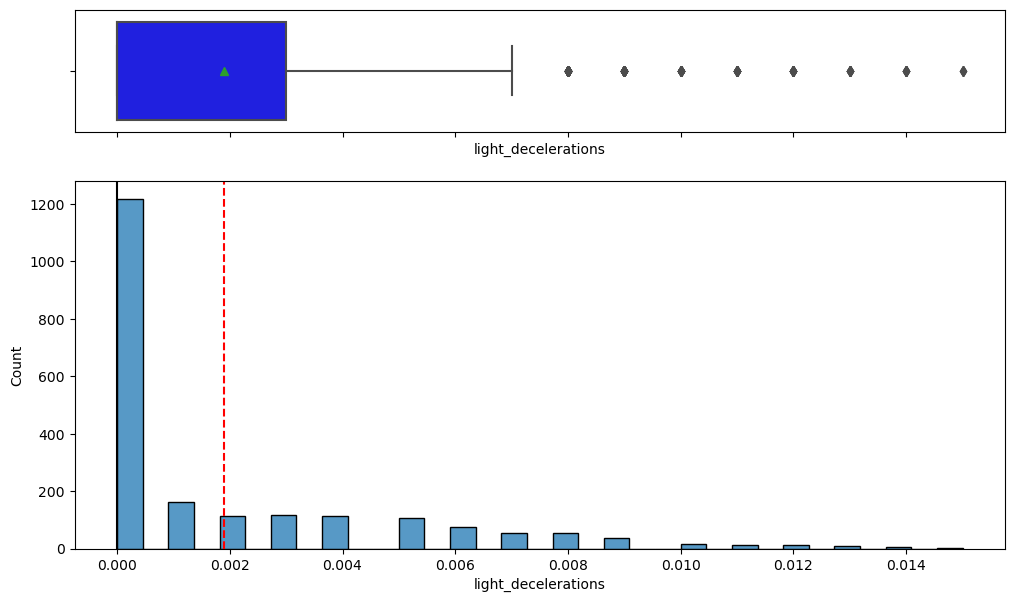

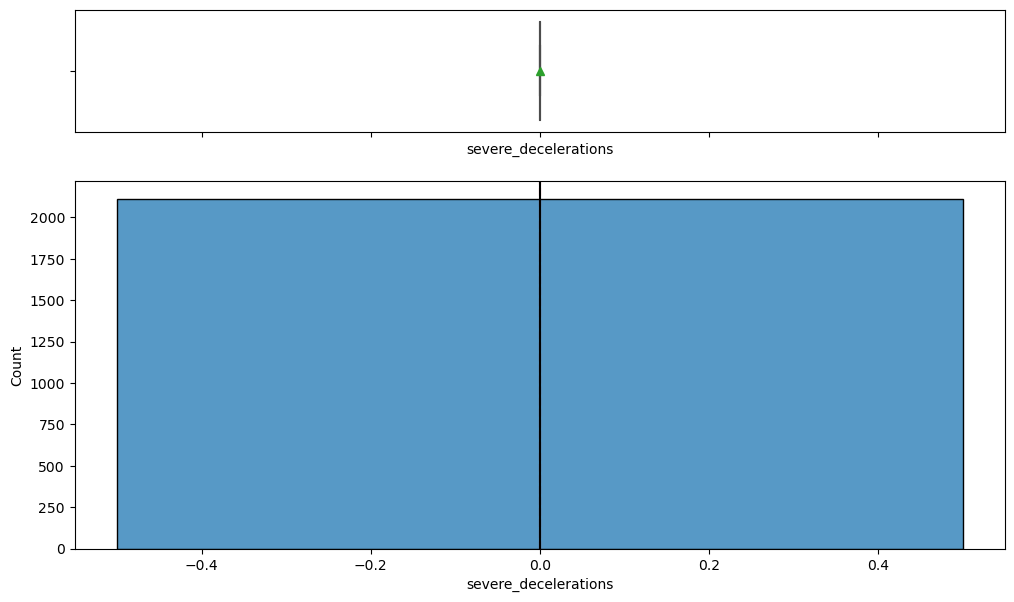

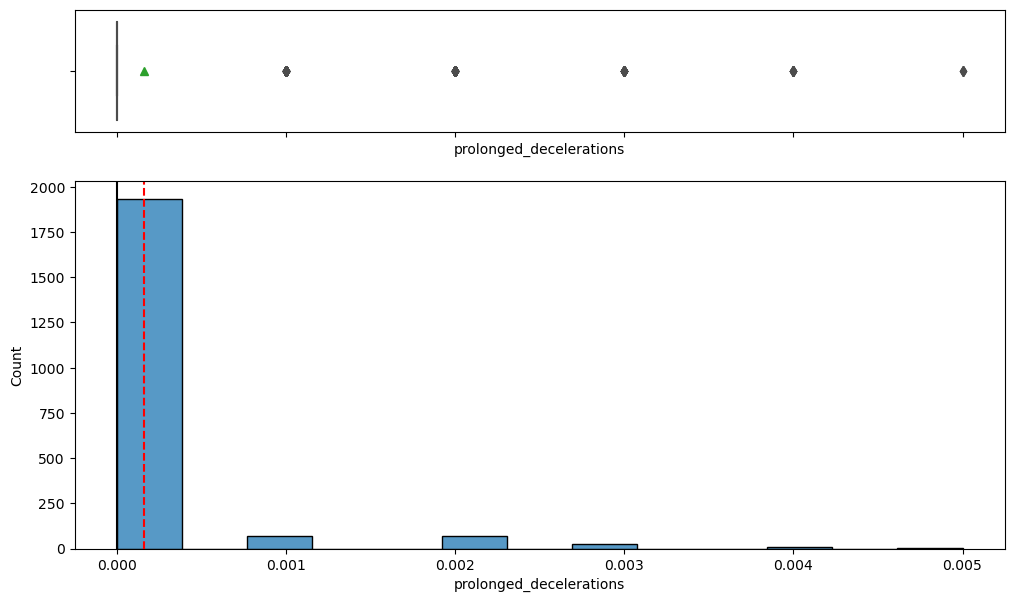

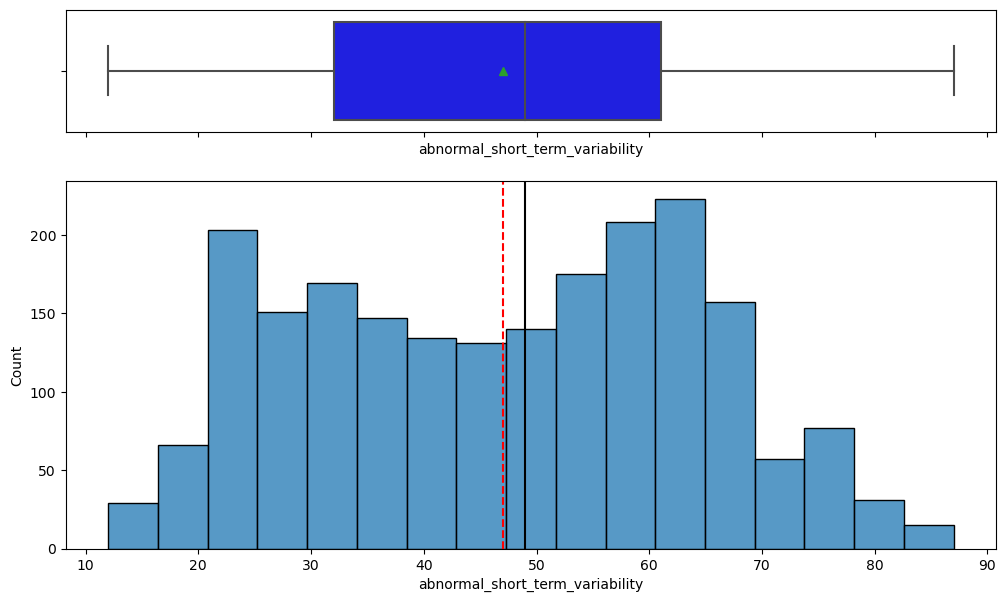

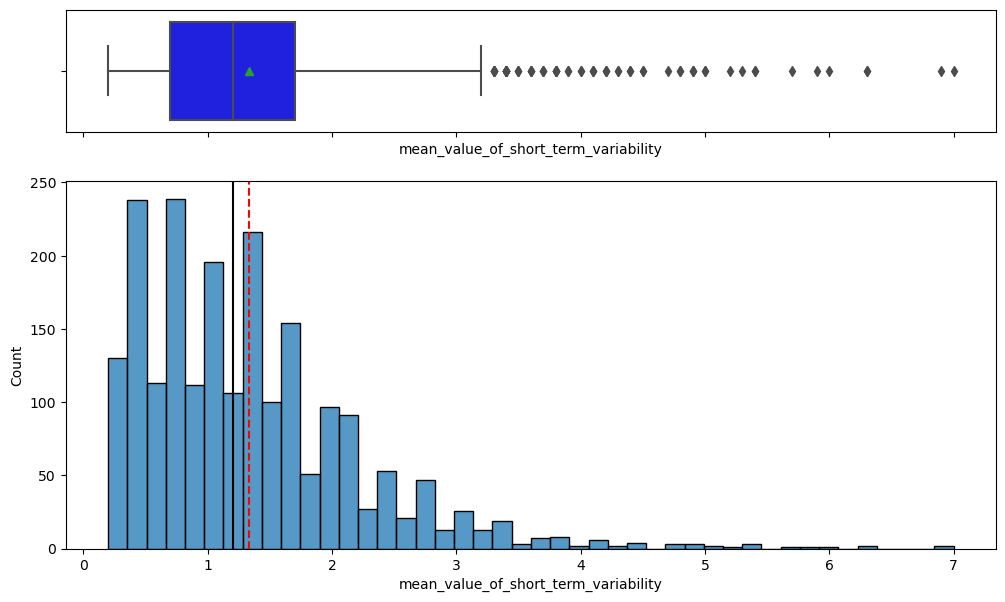

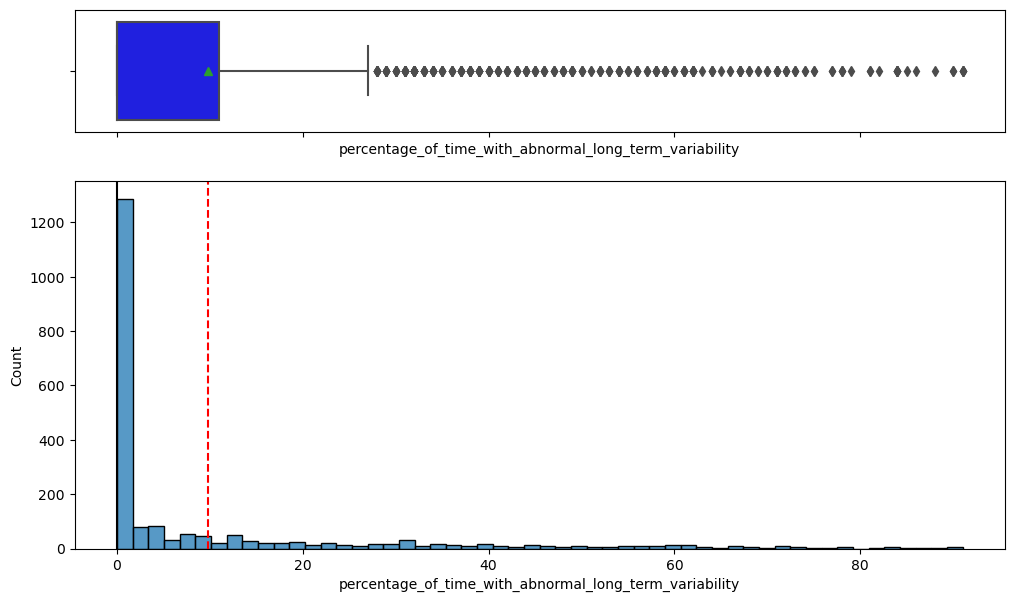

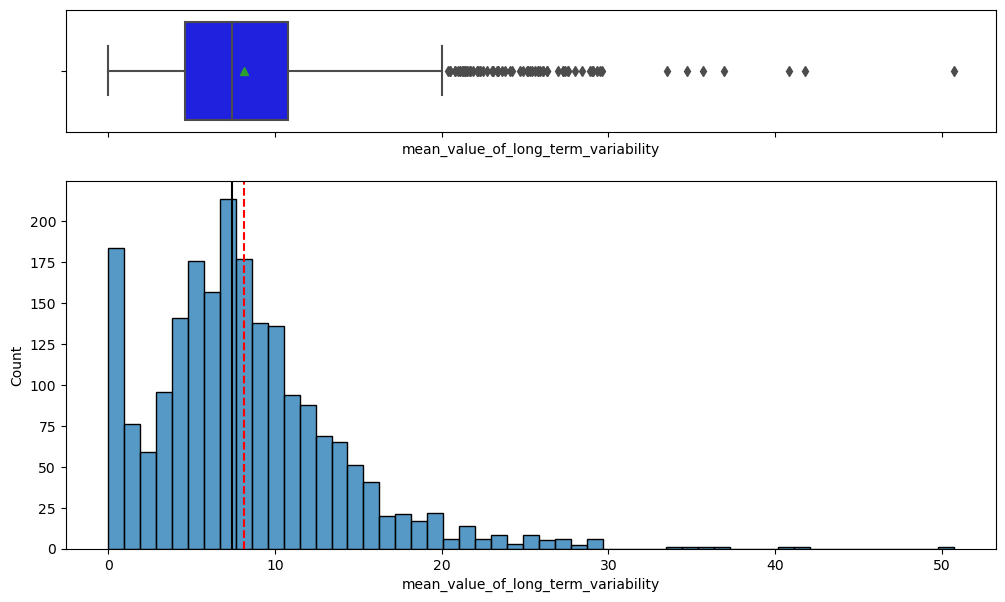

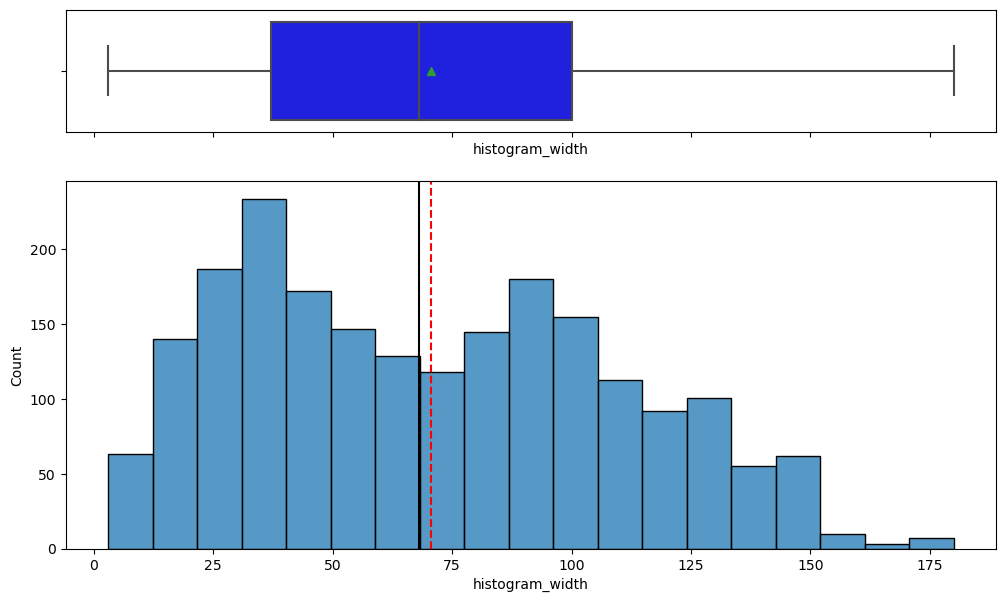

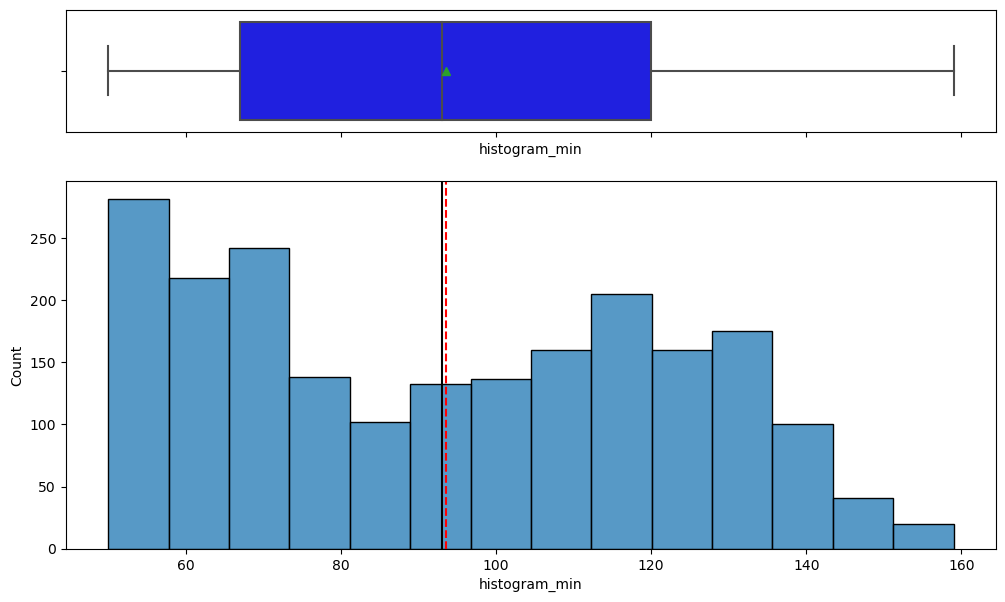

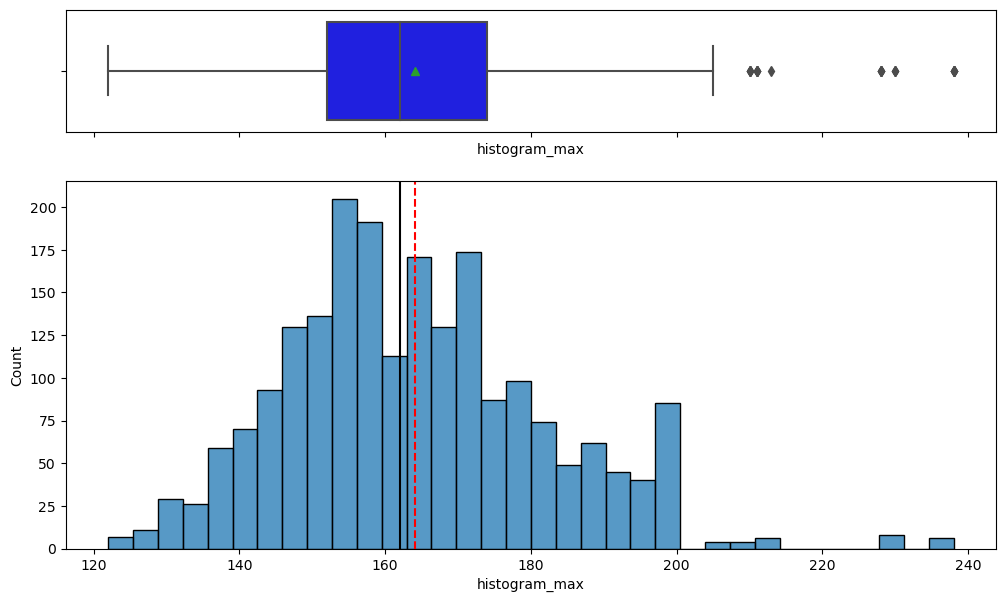

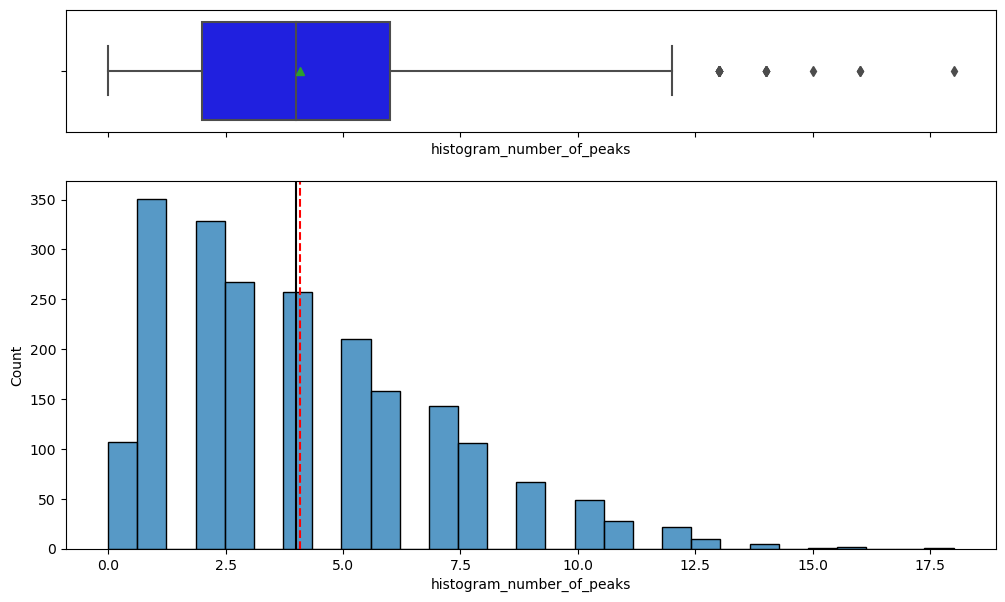

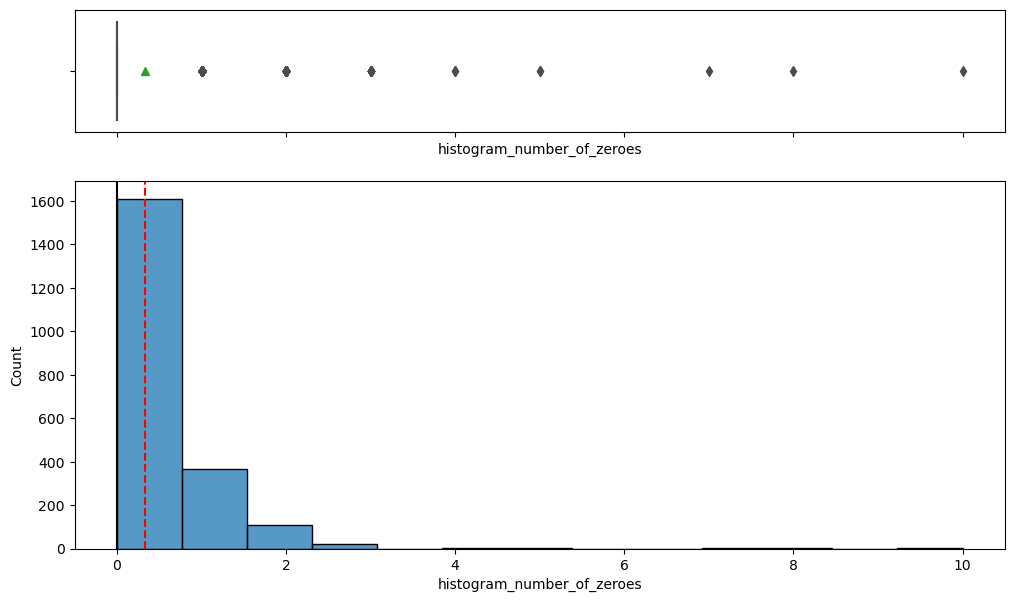

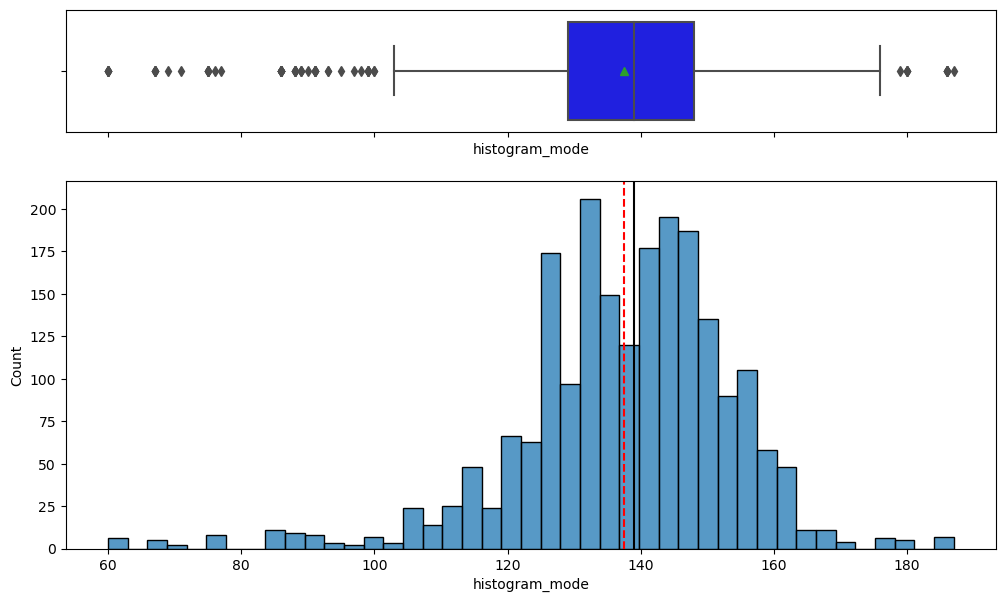

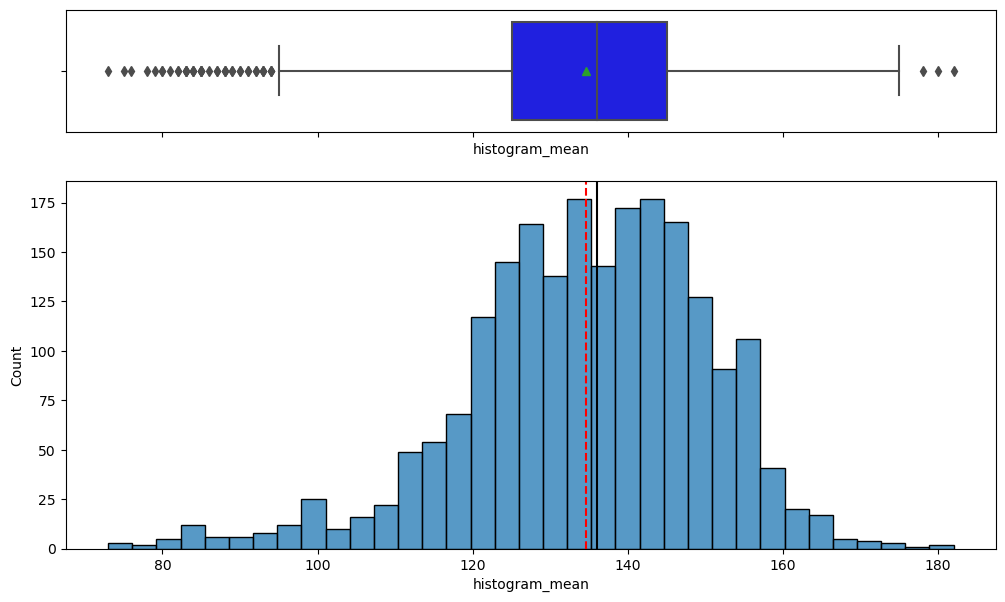

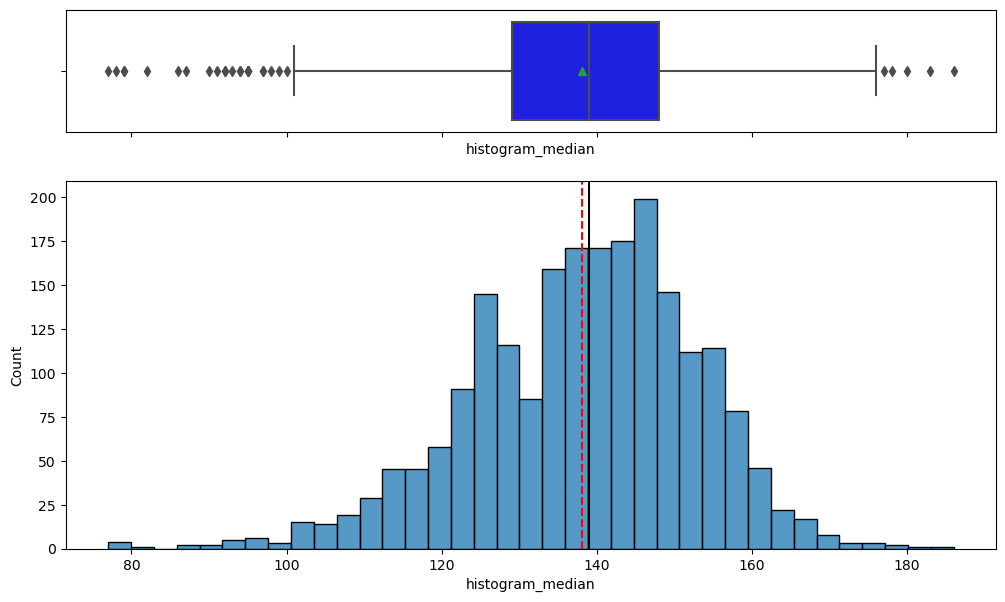

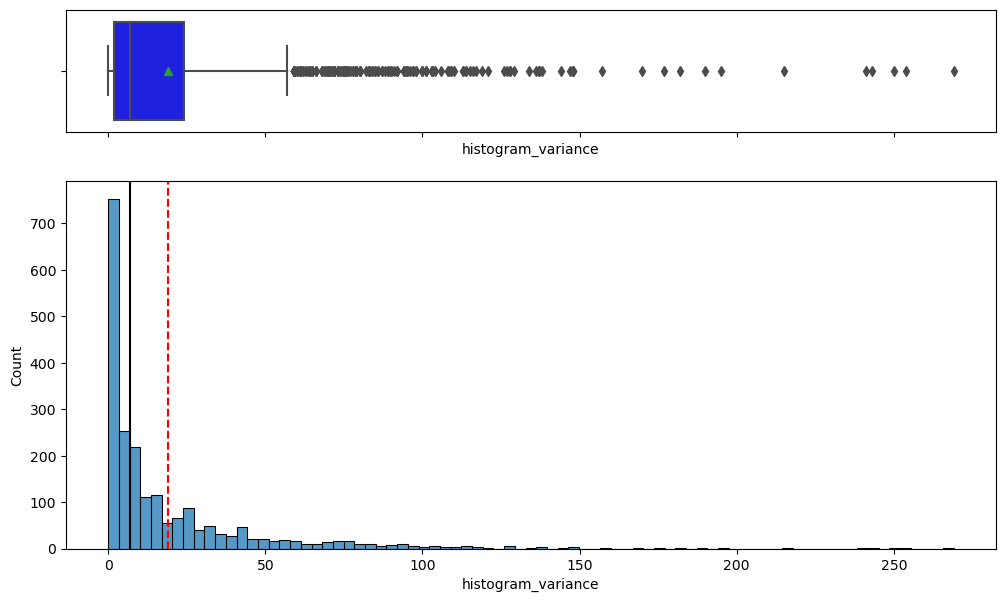

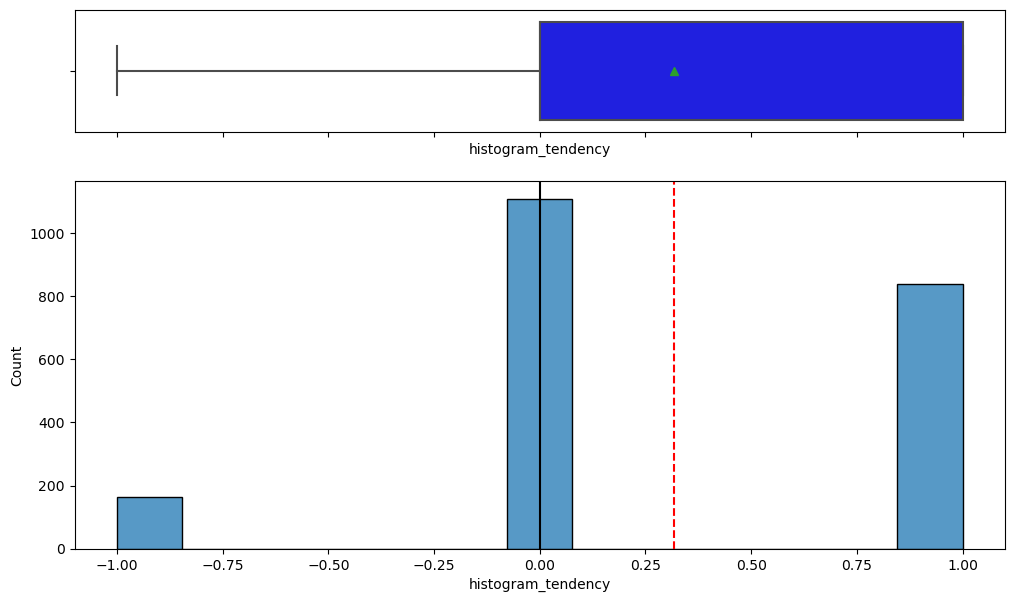

In [20]:
num_cols=df[['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]


for i in num_cols:
    hist_box(num_cols, i)

#### Observations:

##### a) Columns with an approximately normal distribution
- baseline_value
- severe_decelerations

##### b) Columns with a right-skewed distribution
- accelerations
- fetal_movement
- uterine_contractions
- light_decelerations
- prolonged_decelerations
- mean_value_of_short_term_variability
- percentage_of_time_with_abnormal_long_term_variability
- mean_value_of_long_term_variability
- histogram_width
- histogram_min 
- histogram_max  
- histogram_number_of_peaks  
- histogram_number_of_zeroes   
- histogram_variance  
- histogram_tendency       



##### c) Columns with a left-skewed distribution
- abnormal_short_term_variability
- histogram_mode  
- histogram_mean
- histogram_median   

#### Additional Observation:
- Many of the columns have several outliers

### Univariate Analysis of  Categorical Variables (fetal_health)

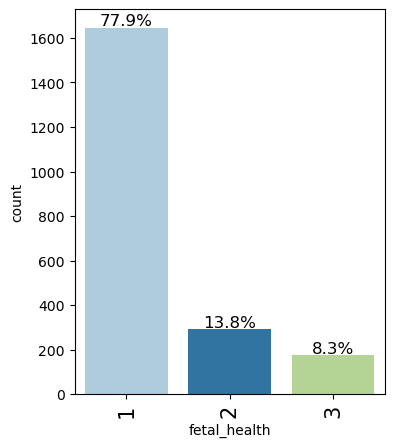

In [21]:
annotated_barplot(df, 'fetal_health')

#### Observation: 
- 77.9% of the fetuses were normal after delivery
- 13.8% were classified of having a suspicious outcome.
- 8.3% were classified as having a pathological outcome.

## Bivariate Analysis

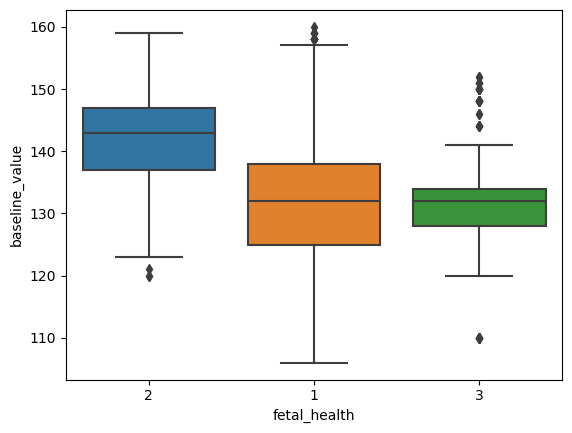

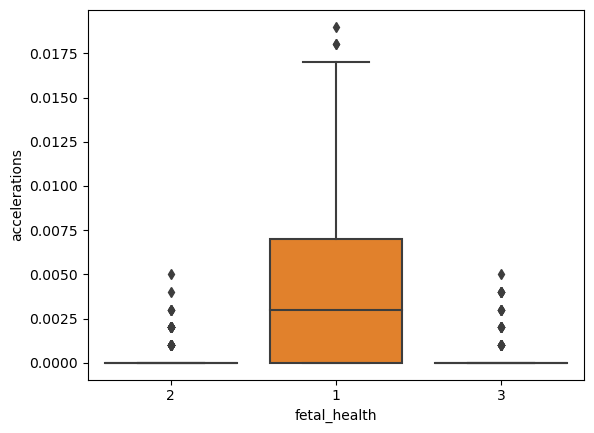

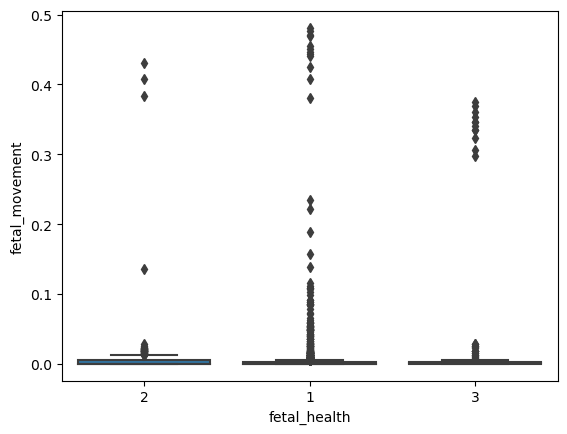

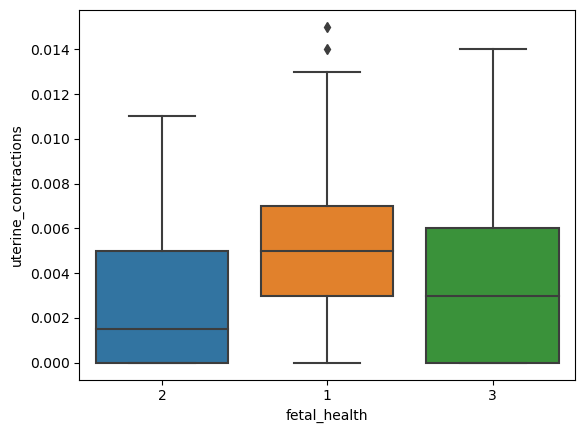

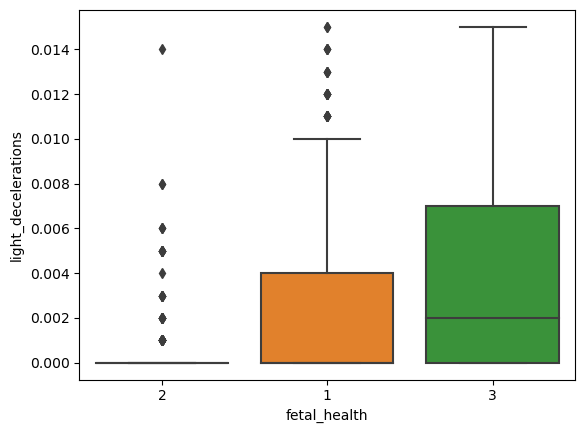

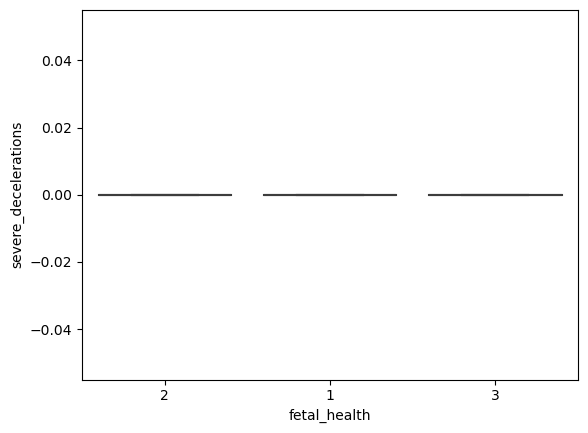

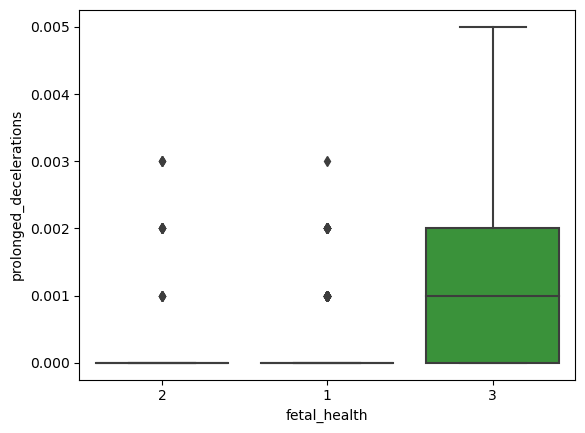

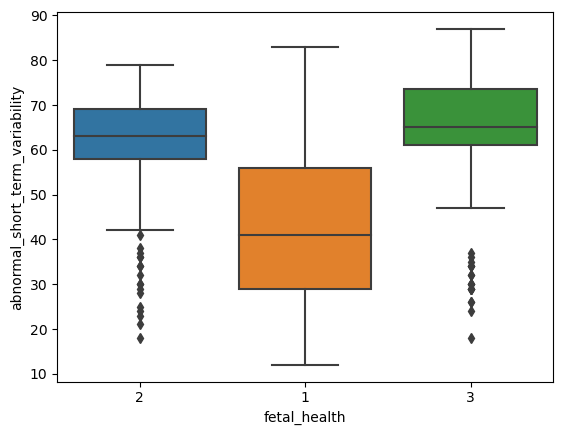

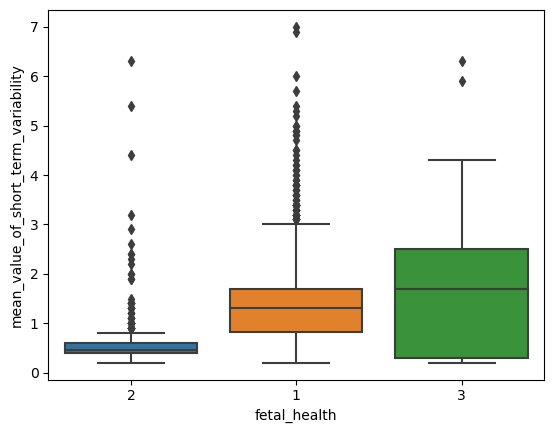

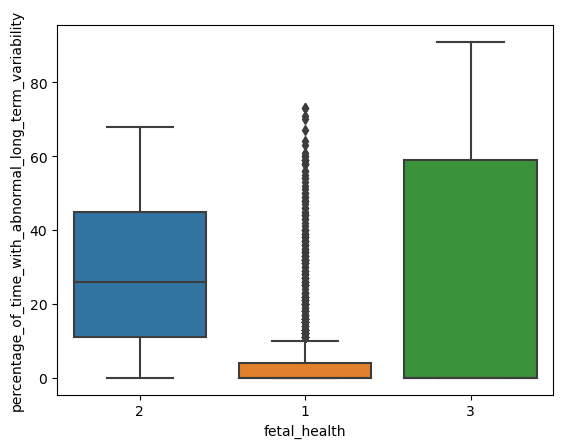

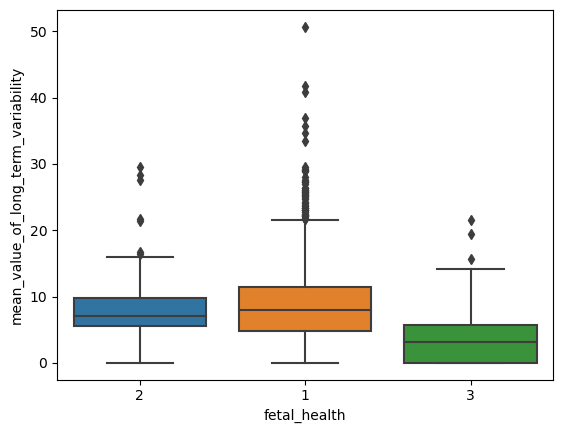

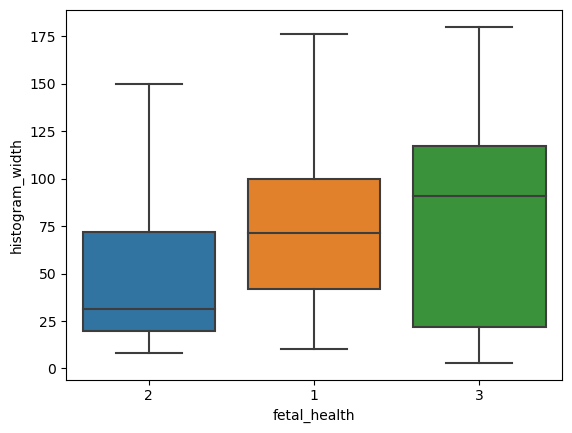

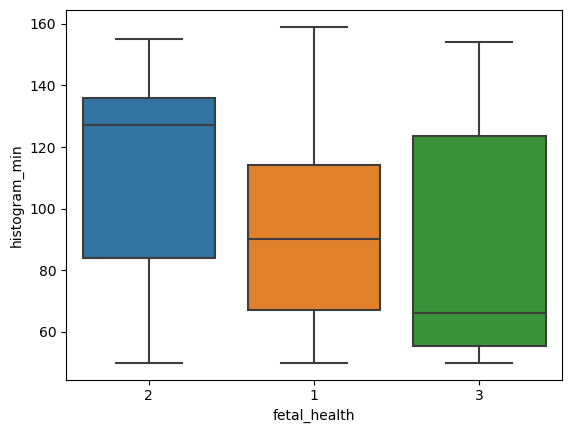

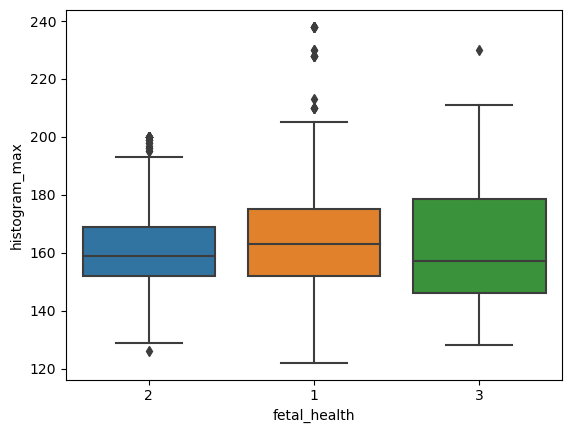

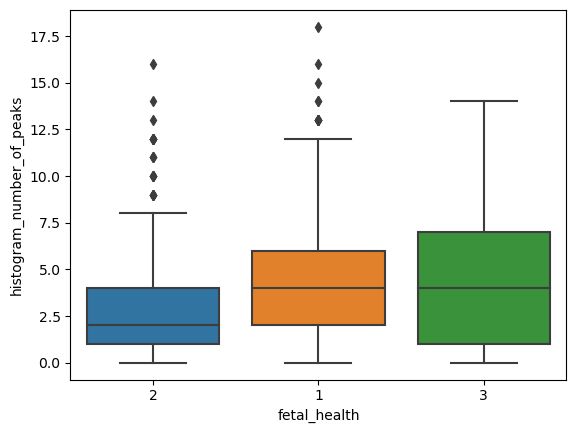

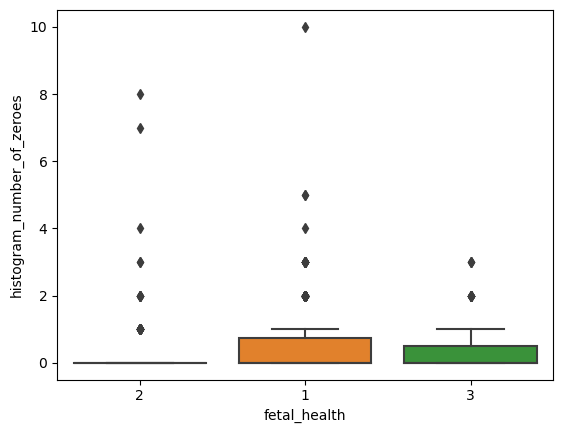

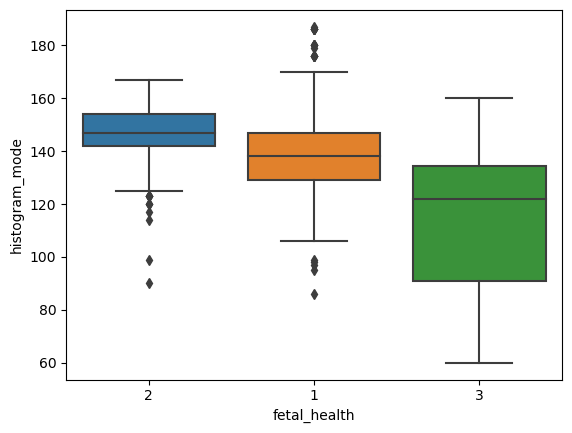

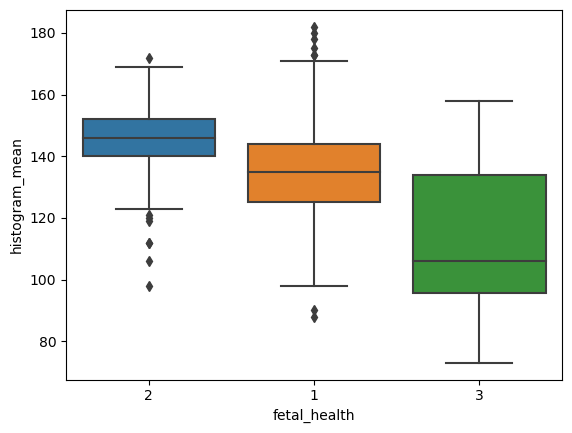

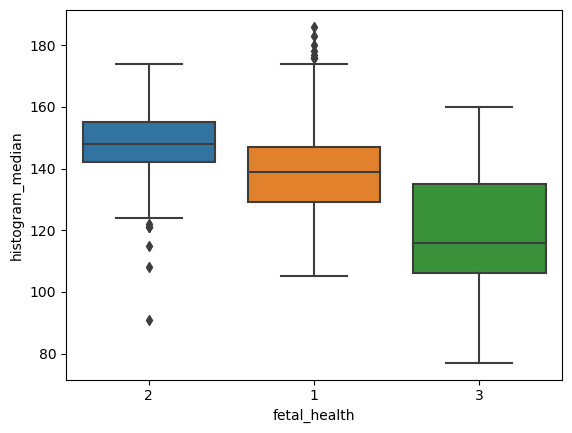

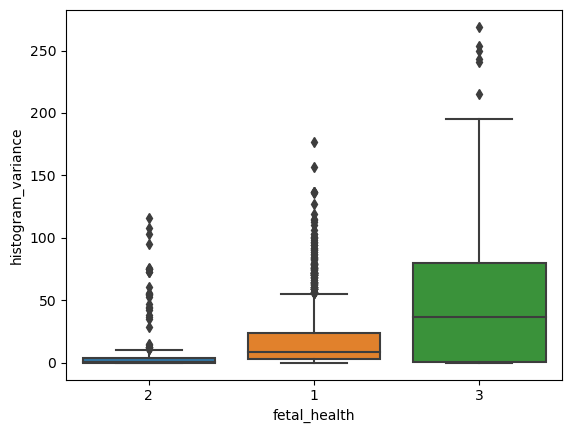

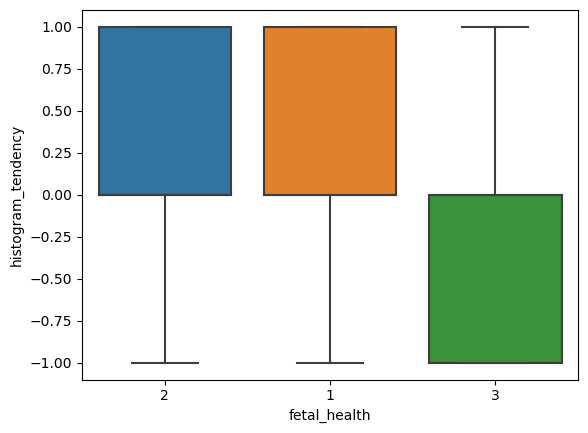

In [22]:
for i in df:
    if i=='fetal_health':
        pass
    else:
        sns.boxplot(data=df, x=df['fetal_health'], y=df[i])
        plt.show()

#### Key observations
##### fetal_heart vrs baseline_value
- Births classified as suspect had the highest median fetal heart rate (above 140 bpm).

##### Accelerations
- Cases with normal fetal health showed accelerations of 0.0025 per second.

##### Uterine Contractions
- Normal fetal health showed the shortest interquartile range (between approximately 0.003 to 0.007).

##### Decelerations
- Pathological cases showed the highest light and severe deceleration values

##### Abnormal and Mean Variability Short Term Variability 
- Pathological cases showed the highest percentages for abnormal short term variability and mean value of short term variability

##### Mean value of long term variability
- Normal cases had the highest mean value of long term variability compared to the others

### Pairplots

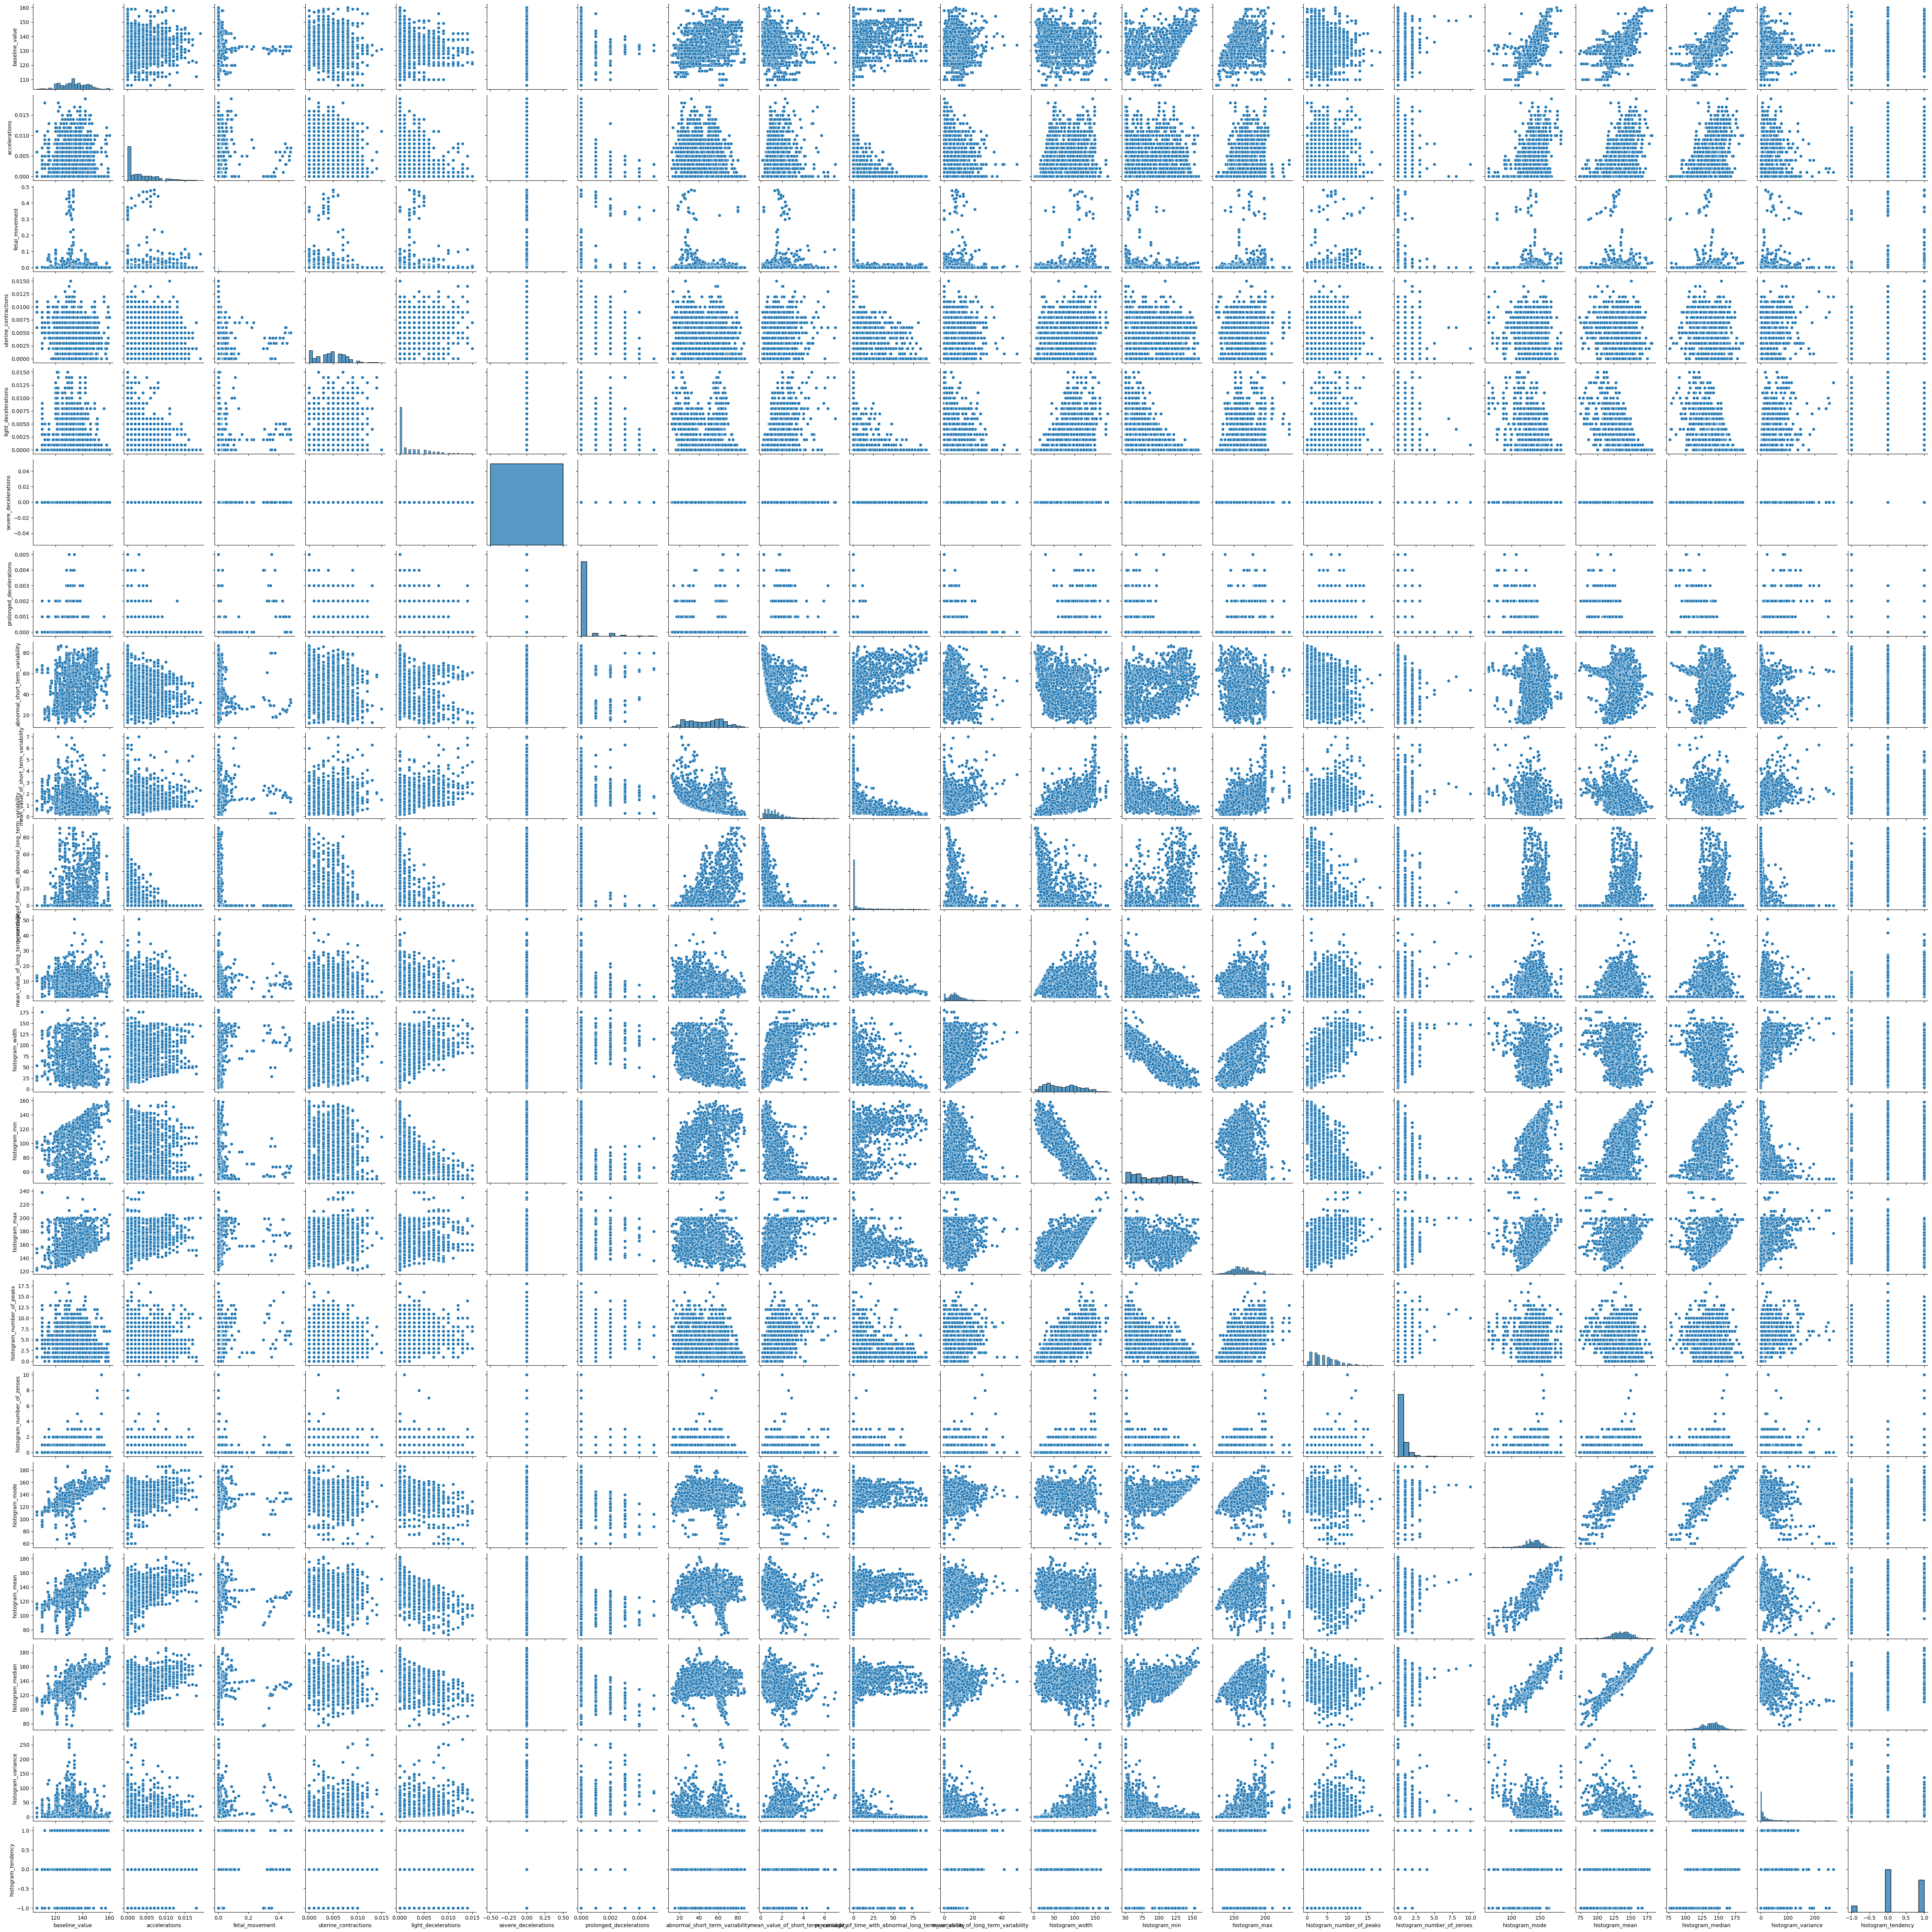

In [23]:
#Make a pair-wise visualization of numerical variables
sns.pairplot(num_cols)
plt.show()

### Correlation Table

In [24]:
#Create a correlation table for the numerical columns
corr = df.corr()
corr

baseline_value  \
baseline_value                                            1.000000   
accelerations                                            -0.081885   
fetal_movement                                           -0.033949   
uterine_contractions                                     -0.149587   
light_decelerations                                      -0.159836   
severe_decelerations                                           NaN   
prolonged_decelerations                                  -0.105003   
abnormal_short_term_variability                           0.303502   
mean_value_of_short_term_variability                     -0.278344   
percentage_of_time_with_abnormal_long_term_vari...        0.283918   
mean_value_of_long_term_variability                      -0.028901   
histogram_width                                          -0.147150   
histogram_min                                             0.360129   
histogram_max                                             0.273402   
histogram_number_of_peaks                                -0.113242   
histogram_number_of_zeroes                               -0.004807   
histogram_mode                                            0.708074   
histogram_mean                                            0.722152   
histogram_median                                          0.788487   
histogram_variance                                       -0.134458   
histogram_tendency                                        0.294412   

                                                    accelerations  \
baseline_value                                          -0.081885   
accelerations                                            1.000000   
fetal_movement                                           0.048114   
uterine_contractions                                     0.086174   
light_decelerations                                     -0.110595   
severe_decelerations                                          NaN   
prolonged_decelerations                                 -0.128682   
abnormal_short_term_variability                         -0.280495   
mean_value_of_short_term_variability                     0.206762   
percentage_of_time_with_abnormal_long_term_vari...      -0.373507   
mean_value_of_long_term_variability                     -0.141413   
histogram_width                                          0.298350   
histogram_min                                           -0.155306   
histogram_max                                            0.392684   
histogram_number_of_peaks                                0.189209   
histogram_number_of_zeroes                              -0.007360   
histogram_mode                                           0.243083   
histogram_mean                                           0.270266   
histogram_median                                         0.272507   
histogram_variance                                       0.124433   
histogram_tendency                                       0.030670   

                                                    fetal_movement  \
baseline_value                                           -0.033949   
accelerations                                             0.048114   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.069867   
light_decelerations                                       0.048795   
severe_decelerations                                           NaN   
prolonged_decelerations                                   0.265802   
abnormal_short_term_variability                          -0.104876   
mean_value_of_short_term_variability                      0.121532   
percentage_of_time_with_abnormal_long_term_vari...       -0.074900   
mean_value_of_long_term_variability                       0.011749   
histogram_width                                           0.162803   
histogram_min                                            -0.154297   
histogram_ma

### Heatmap

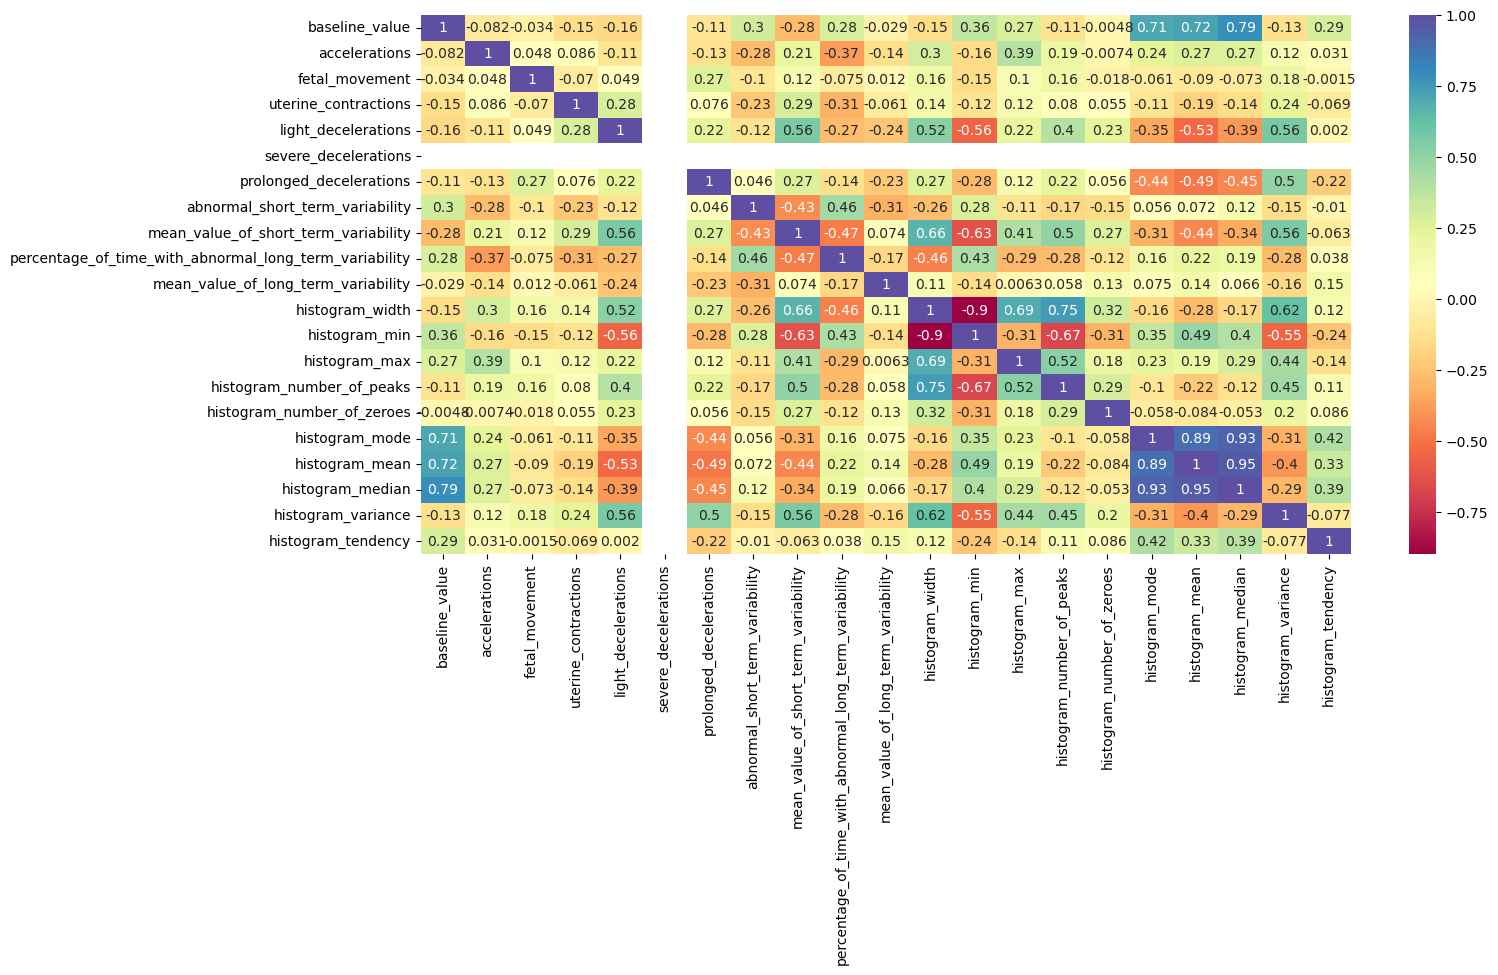

In [25]:
# Draw a heatmap to visualize the correlations
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, cmap="Spectral")
plt.show()

#### Observation
##### Strong Positive Correlelations
- histogram_mode and baseline_value
- histogram_mean and baseline_value
- histogram_median and baseline_value
- histogram_mean and histogram_mode
- histogram_median and histogram_mode
- histogram_mean and histogram_median

##### Strong Negative Correlations
- histogram_width and histogram_min

##### Moderately Strong Correlations
- mean_value_of_short_term_variability and light_decelerations

## Outlier Detection and Treatment


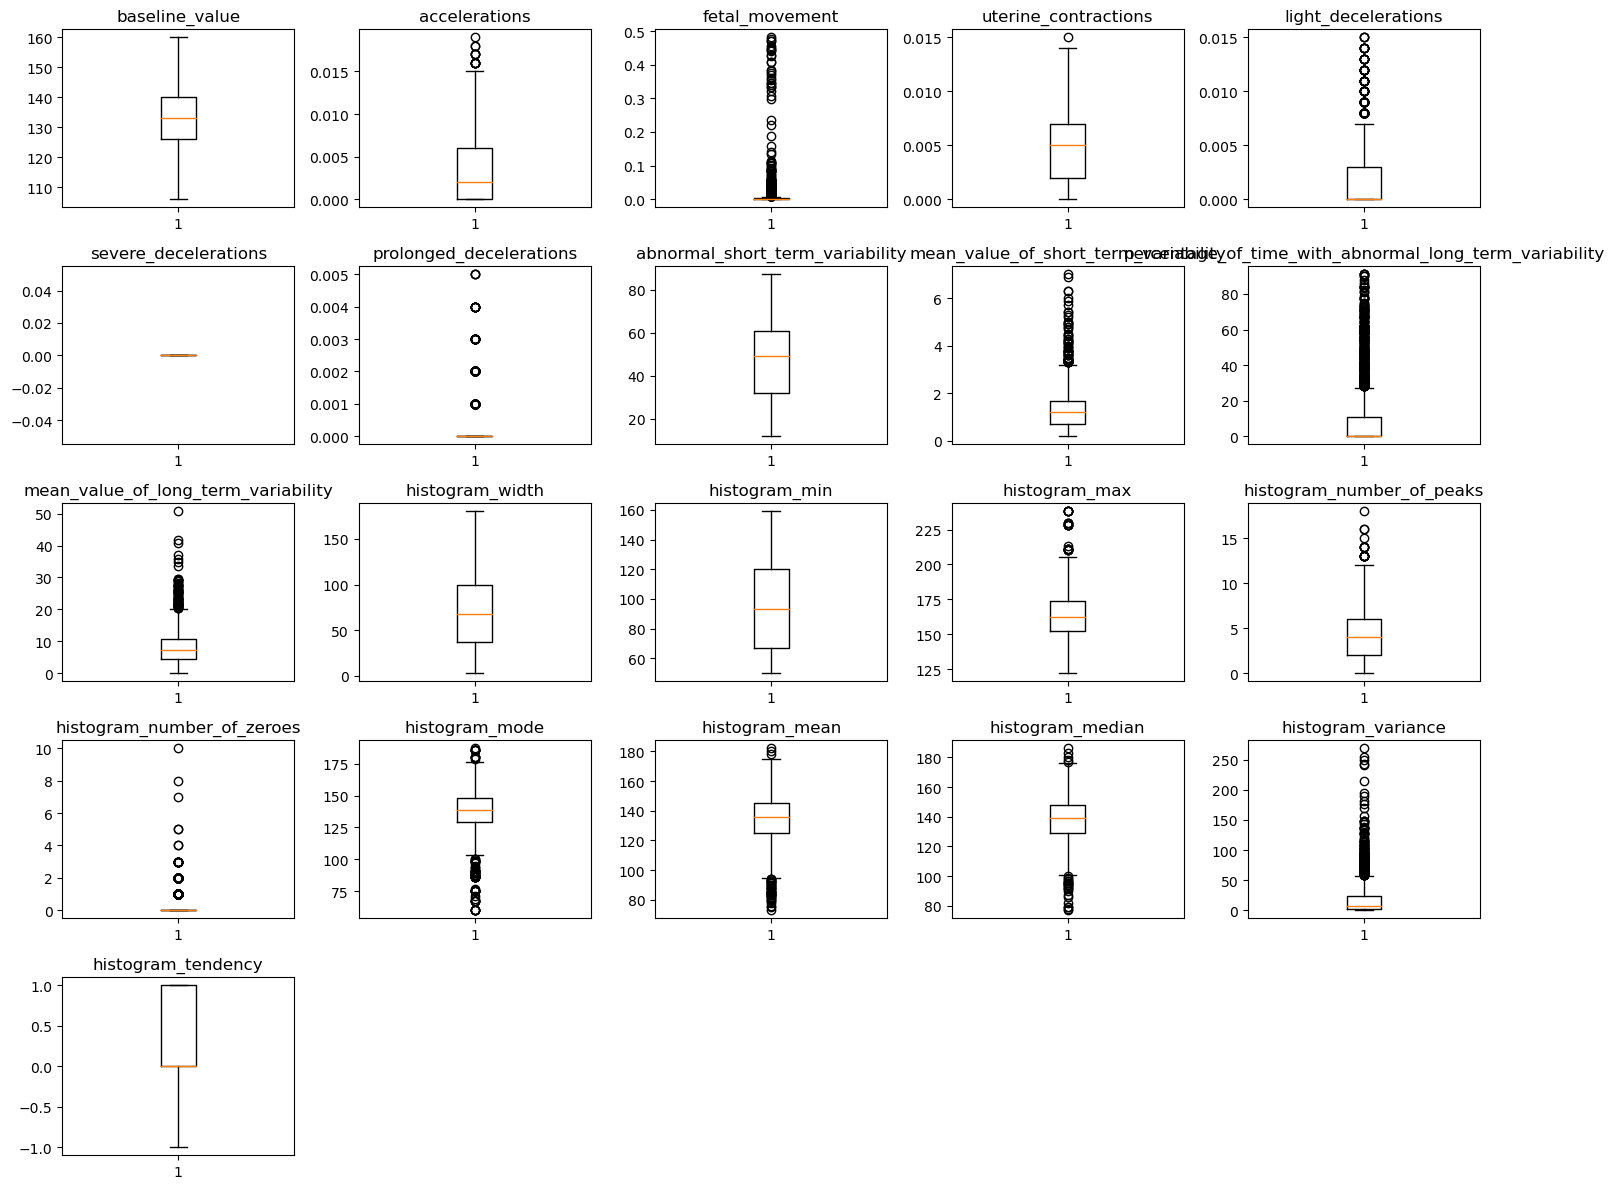

In [26]:
#Detect outliers with boxplots
plt.figure(figsize=(15, 12))
           
for i, variable in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [27]:
#Remove outliers in a copy of the cleaned dataset
df_1=df.copy()
for i in num_cols:
    Q1 = df_1[i].quantile(0.25)
    Q3 = df_1[i].quantile(0.75)
    IQR = Q3 - Q1
    df_1 = df_1[~((df_1[i] < (Q1 - 1.5 * IQR)) | (df_1[i] >(Q3 + 1.5 * IQR)))]
df_1.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
7              122            0.0             0.0                 0.000   
8              122            0.0             0.0                 0.002   
9              122            0.0             0.0                 0.003   
23             128            0.0             0.0                 0.000   
26             124            0.0             0.0                 0.000   

    light_decelerations  severe_decelerations  prolonged_decelerations  \
7                   0.0                     0                      0.0   
8                   0.0                     0                      0.0   
9                   0.0                     0                      0.0   
23                  0.0                     0                      0.0   
26                  0.0                     0                      0.0   

    abnormal_short_term_variability  mean_value_of_short_term_variability  \
7                                83                                   0.5   
8                                84                                   0.5   
9                                86                                   0.3   
23                               80                                   0.5   
26                               86                                   0.4   

    percentage_of_time_with_abnormal_long_term_variability  ...  \
7                                                   6       ...   
8                                                   5       ...   
9                                                   6       ...   
23                                                  0       ...   
26                                                 14       ...   

    histogram_min  histogram_max  histogram_number_of_peaks  \
7              62            130                          0   
8              62            130                          0   
9              62            130                          1   
23            114            130                          0   
26            122            146                          1   

    histogram_number_of_zeroes  histogram_mode  histogram_mean  \
7                            0             122             122   
8                            0             122             122   
9                            0             122             122   
23                           0             126             124   
26                           0             126             126   

    histogram_median  histogram_variance  histogram_tendency  fetal_health  
7                123                   3                   1             3  
8                123                   3                   1             3  
9                123                   1                   1             3  
23               125                   1                   1             3  
26               127                   0                  -1             3  

[5 rows x 22 columns]

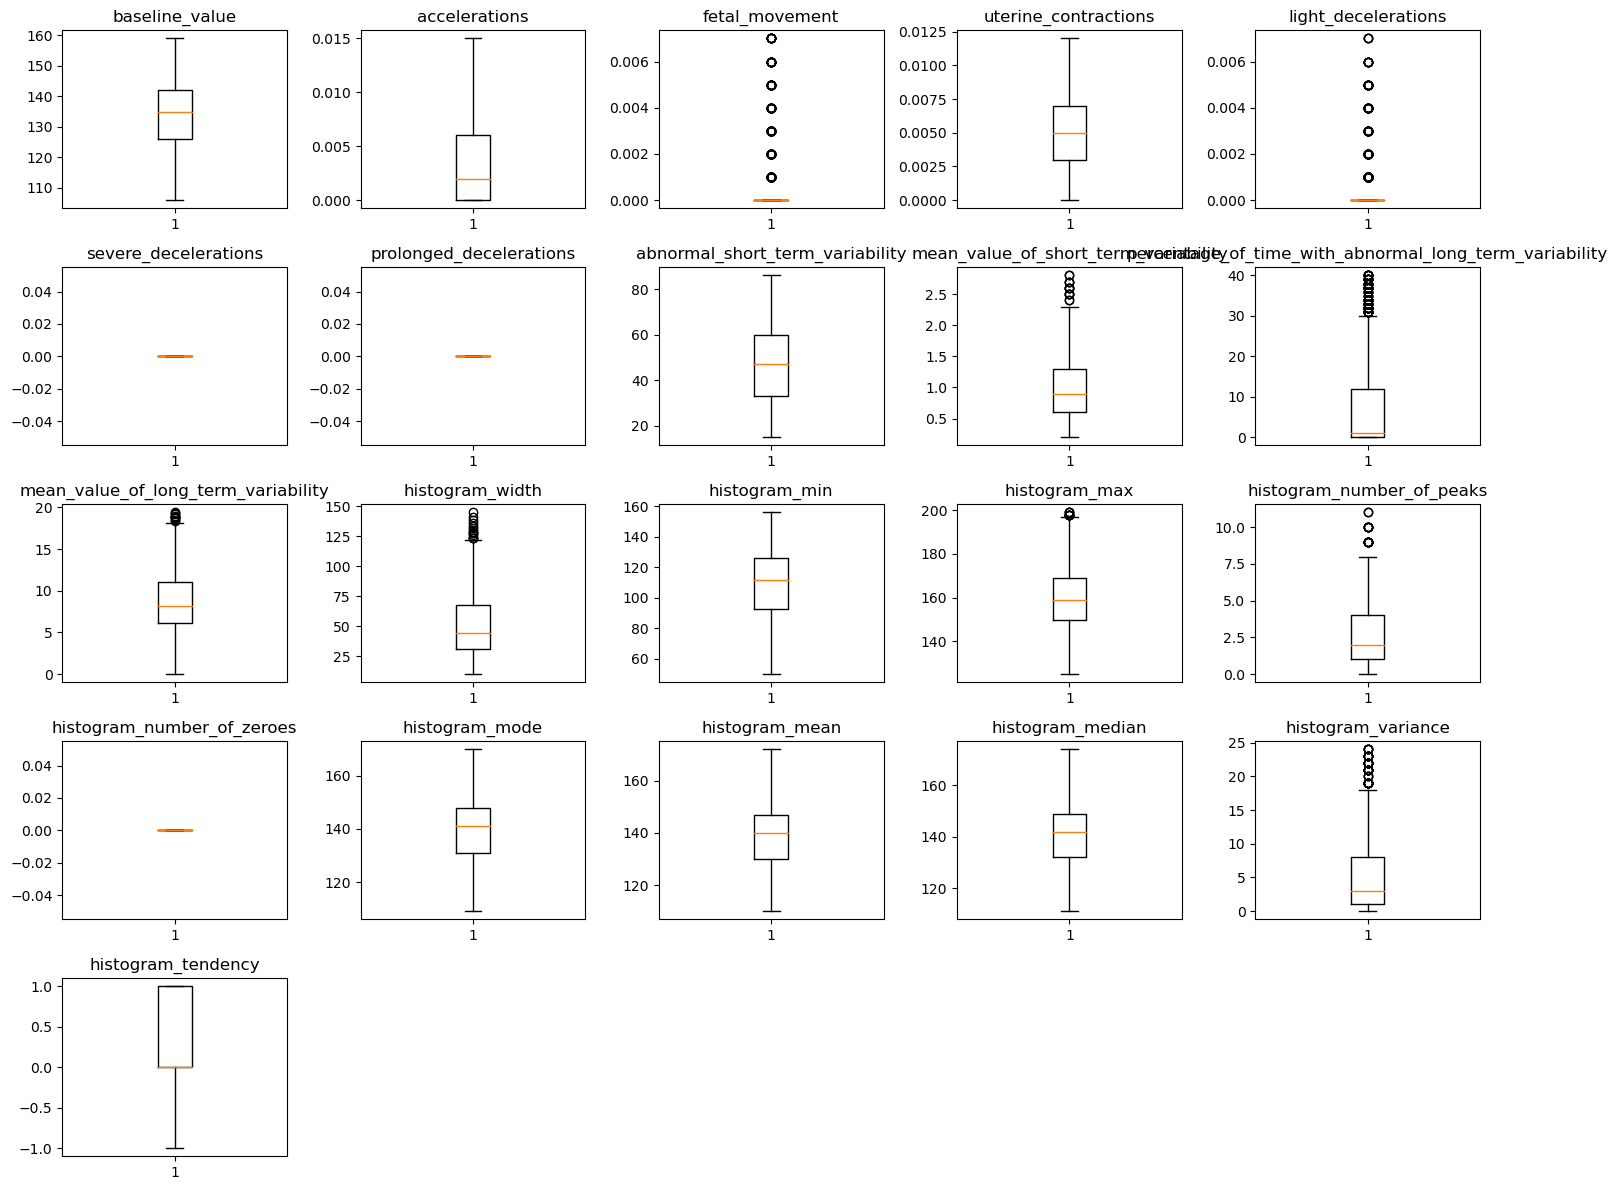

In [28]:
# Check again for outliers
plt.figure(figsize=(15, 12))
           
for i, variable in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(df_1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation:
- True outliers have been removed

## Variable Selection

In [29]:
# Drop all columns related to histogram features
df_2= df_1.drop(['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'], axis=1)

df_2.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
7              122            0.0             0.0                 0.000   
8              122            0.0             0.0                 0.002   
9              122            0.0             0.0                 0.003   
23             128            0.0             0.0                 0.000   
26             124            0.0             0.0                 0.000   

    light_decelerations  severe_decelerations  prolonged_decelerations  \
7                   0.0                     0                      0.0   
8                   0.0                     0                      0.0   
9                   0.0                     0                      0.0   
23                  0.0                     0                      0.0   
26                  0.0                     0                      0.0   

    abnormal_short_term_variability  mean_value_of_short_term_variability  \
7                                83                                   0.5   
8                                84                                   0.5   
9                                86                                   0.3   
23                               80                                   0.5   
26                               86                                   0.4   

    percentage_of_time_with_abnormal_long_term_variability  \
7                                                   6        
8                                                   5        
9                                                   6        
23                                                  0        
26                                                 14        

    mean_value_of_long_term_variability fetal_health  
7                                  15.6            3  
8                                  13.6            3  
9                                  10.6            3  
23                                  6.8            3  
26                                  4.8            3

## Statistical Analysis

### 1. Descriptive Statistics

In [30]:
df_2.describe()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
count      903.000000     903.000000      903.000000            903.000000   
mean       134.177187       0.003145        0.000704              0.004480   
std         10.204975       0.003572        0.001516              0.002735   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.003000   
50%        135.000000       0.002000        0.000000              0.005000   
75%        142.000000       0.006000        0.000000              0.007000   
max        159.000000       0.015000        0.007000              0.012000   

       light_decelerations  severe_decelerations  prolonged_decelerations  \
count           903.000000                 903.0                    903.0   
mean              0.000561                   0.0                      0.0   
std               0.001270                   0.0                      0.0   
min               0.000000                   0.0                      0.0   
25%               0.000000                   0.0                      0.0   
50%               0.000000                   0.0                      0.0   
75%               0.000000                   0.0                      0.0   
max               0.007000                   0.0                      0.0   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                       903.000000                            903.000000   
mean                         46.933555                              0.984939   
std                          16.315216                              0.486577   
min                          15.000000                              0.200000   
25%                          33.000000                              0.600000   
50%                          47.000000                              0.900000   
75%                          60.000000                              1.300000   
max                          86.000000                              2.800000   

       percentage_of_time_with_abnormal_long_term_variability  \
count                                          903.00000        
mean                                             7.72979        
std                                             11.24481        
min                                              0.00000        
25%                                              0.00000        
50%                                              1.00000        
75%                                             12.00000        
max                                             40.00000        

       mean_value_of_long_term_variability  
count                           903.000000  
mean                              8.583610  
std                               3.886054  
min                               0.000000  
25%                               6.150000  
50%                               8.200000  
75%                              11.000000  
max                              19.400000

#### Observation
The table above provides a general statistical summary of the numerical values of the dataset.
This comprises the:
- count
- mean
- standard deviation
- minimum value
- quartile values
- maximum value

### 2. Analysis of Variance (ANOVA) for the 3 Fetal Status Groups

In [31]:
# Delineate Groups
normal= df_2[df_2['fetal_health']=='1']
suspect= df_2[df_2['fetal_health']=='2']
pathological= df_2[df_2['fetal_health']=='3']

#Define numerical values in this dataset
num_cols_2= df_2[['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']]
#ANOVA
#H0: There is no difference in the means of the 3 groups
#H1: A difference exists in the means of at least 2 groups

#oneway anova
for item in num_cols_2:
  f_value, p_value = stats.f_oneway(normal[item], suspect[item], pathological[item])
  print(f"{item}: F= {f_value:2}, p= {p_value}")

baseline_value: F= 56.96886959741885, p= 5.058825000193401e-24
accelerations: F= 63.170156751909175, p= 2.1281621669364536e-26
fetal_movement: F= 11.703852474854989, p= 9.595264427677007e-06
uterine_contractions: F= 45.83101163014362, p= 1.1103820768794554e-19
light_decelerations: F= 10.498691762368544, p= 3.110647973034387e-05
severe_decelerations: F= nan, p= nan
prolonged_decelerations: F= nan, p= nan
abnormal_short_term_variability: F= 138.0920661237918, p= 4.957206445934528e-53
mean_value_of_short_term_variability: F= 100.81317161572343, p= 3.1166536679455723e-40
percentage_of_time_with_abnormal_long_term_variability: F= 120.77963751756997, p= 3.426250426651787e-47
mean_value_of_long_term_variability: F= 0.9146211982687983, p= 0.40104045324115234


#### Observation
A statistically significant variation was found among the means of the following variables:
- baseline_value
- accelerations
- fetal_movement
- uterine_contractions
- light_decelerations
- abnormal_short_term_variability
- mean_value_of_short_term_variability

### Drop Stastically Insignificant Parameters

In [32]:
df_3= df_2.drop(['severe_decelerations', 'prolonged_decelerations', 
                 'percentage_of_time_with_abnormal_long_term_variability',
                  'mean_value_of_long_term_variability' ], axis=1)

df_3.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
7              122            0.0             0.0                 0.000   
8              122            0.0             0.0                 0.002   
9              122            0.0             0.0                 0.003   
23             128            0.0             0.0                 0.000   
26             124            0.0             0.0                 0.000   

    light_decelerations  abnormal_short_term_variability  \
7                   0.0                               83   
8                   0.0                               84   
9                   0.0                               86   
23                  0.0                               80   
26                  0.0                               86   

    mean_value_of_short_term_variability fetal_health  
7                                    0.5            3  
8                                    0.5            3  
9                                    0.3            3  
23                                   0.5            3  
26                                   0.4            3

## Prepare Dataset for modeling: Splitting

In [33]:
# Separating features and the target column
X = df_3.drop('fetal_health', axis=1)
y = df_3['fetal_health']

#Split into train set and test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

#Evaluate the size/shape of the train set and test set
X_train.shape, X_test.shape

((632, 7), (271, 7))

## Models to Predict Child and Maternal Mortality

1. Logistic Regression
2. Decision Tree
3. Random Forest

### Model 1: Logistic Regression

In [34]:
#Draw a Regression model
model= LogisticRegression()
model.fit(X_train, y_train)


#Perform regression analysis on the test set
y_pred=model.predict(X_test)


#Find out how well the model can predict outcomes
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n Classification Report: \n', classification_report(y_test, y_pred))
print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8413284132841329

 Classification Report: 
               precision    recall  f1-score   support

           1       0.88      0.96      0.92       223
           2       0.46      0.29      0.36        41
           3       0.75      0.43      0.55         7

    accuracy                           0.84       271
   macro avg       0.70      0.56      0.61       271
weighted avg       0.82      0.84      0.82       271


 Confusion Matrix: 
 [[213  10   0]
 [ 28  12   1]
 [  0   4   3]]


#### Observations:
The logistic regression model has the following performance parameters:
- Accuracy: 84%
- Recall: 96%
- Precision: 88%
- F1-Score: 92%

#### Conclusion:
This model will be able to predict fetal and maternal mortality 84% of the time

### Model 2: Decision Tree

In [35]:
## Performance on train set
model_2 = DecisionTreeClassifier(random_state=1)
model_2.fit(X_train, y_train)

#Perform decision tree analysis on the test set
y_pred_2=model_2.predict(X_test)

#Find out how well the model can predict outcomes
print('Accuracy:', accuracy_score(y_test, y_pred_2))
print('\n Classification Report: \n', classification_report(y_test, y_pred_2))
print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred_2))

Accuracy: 0.8782287822878229

 Classification Report: 
               precision    recall  f1-score   support

           1       0.91      0.95      0.93       223
           2       0.63      0.54      0.58        41
           3       1.00      0.71      0.83         7

    accuracy                           0.88       271
   macro avg       0.85      0.73      0.78       271
weighted avg       0.87      0.88      0.87       271


 Confusion Matrix: 
 [[211  12   0]
 [ 19  22   0]
 [  1   1   5]]


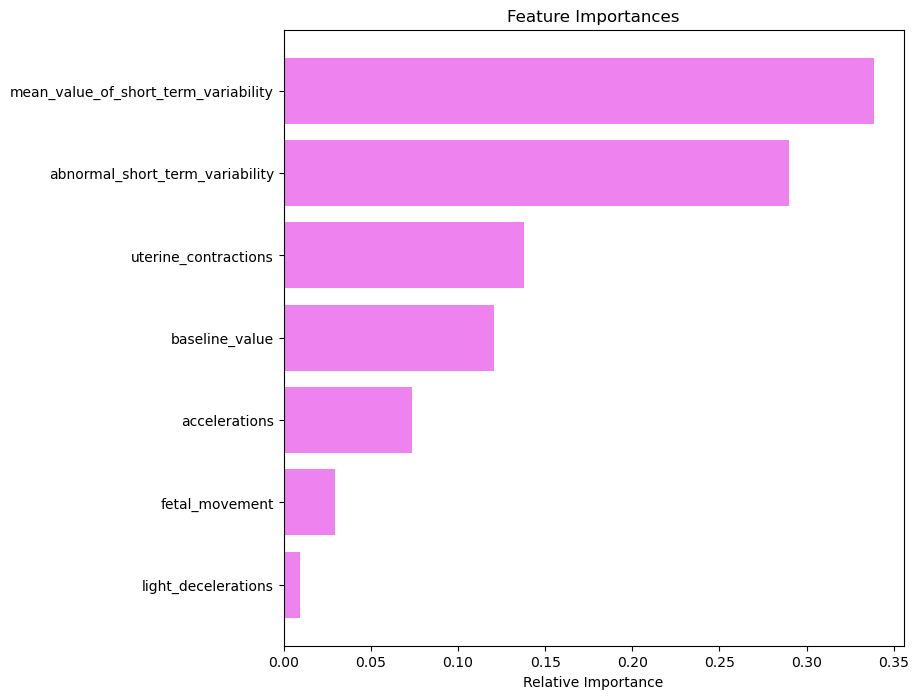

In [36]:
#Exploring the impact of each columns/variable on the model
feature_names = list(X_train.columns)
importances = model_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
The decision tree model has the following performance parameters:
- Accuracy: 88%
- Recall: 95%
- Precision: 91%
- F1-Score: 93%

#### Feature Importance:
In descending order, the most influental predictors in the decision tree model are:
- mean_value_of_short_term_variability
- abnormal_short_term_variability
- uterine_contractions
- baseline_value
- accelerations
- fetal_movement
- light_decelerations

#### Conclusion:
This model will be able to predict fetal and maternal mortality 88% of the time.

### Model 3: Random Forest

In [37]:
#Train the random forest classifier
model_3=RandomForestClassifier(random_state=1)
model_3.fit(X_train,y_train)

#Perform decision tree analysis on the test set
y_pred_3=model_3.predict(X_test)

#Find out how well the model can predict outcomes
print('Accuracy:', accuracy_score(y_test, y_pred_3))
print('\n Classification Report: \n', classification_report(y_test, y_pred_3))
print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred_3))

Accuracy: 0.9077490774907749

 Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.97      0.95       223
           2       0.75      0.59      0.66        41
           3       1.00      0.71      0.83         7

    accuracy                           0.91       271
   macro avg       0.89      0.76      0.81       271
weighted avg       0.90      0.91      0.90       271


 Confusion Matrix: 
 [[217   6   0]
 [ 17  24   0]
 [  0   2   5]]


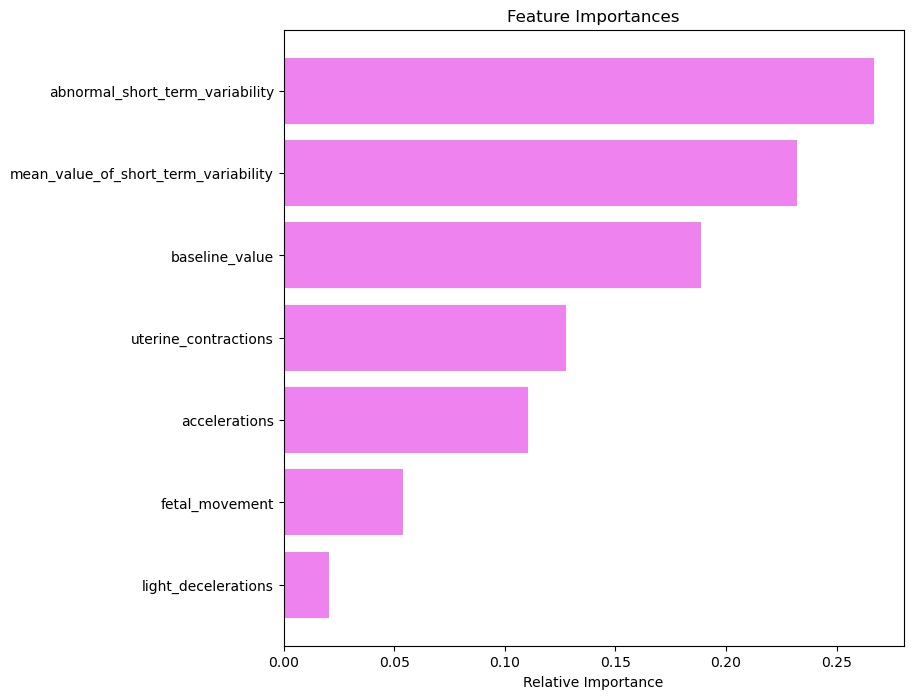

In [38]:
#Exploring the impact of each columns/variable on the model
feature_names = list(X_train.columns)
importances = model_3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
The random forest model has the following performance parameters:
- Accuracy: 90%
- Recall: 97%
- Precision: 93%
- F1-Score: 95%

#### Feature Importance
In descending order, the most influental predictors in the random forest model are:
- abnormal_short_term_variability
- mean_value_of_short_term_variability
- baseline_value
- uterine_contractions
- accelerations
- fetal_movement
- light_decelerations

#### Conclusion:
This model will be able to predict fetal and maternal mortality 90% of the time

### Summary:
- Of the three predictive models used in this analysis, the random forest model had the highest accuracy (90%), recall (97%), precision (93%) and F1-score (95%).
- The predictors of child and maternal mortality in this model are:
1. abnormal_short_term_variability
2. mean_value_of_short_term_variability
3. baseline_value
4. uterine_contractions
5. accelerations
6. fetal_movement
7. light_decelerations


## Reference
Ayres‐de‐Campos, D., Bernardes, J., Garrido, A., Marques‐de‐Sá, J., & Pereira‐Leite, L. (2000). Sisporto 2.0: A program for automated analysis of cardiotocograms. _The Journal of Maternal-Fetal Medicine_, 9(5), 311–318. https://doi.org/10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9